In [1]:
import os
os.chdir(r'E:\Data Science Projects\E commerce')

# __Project Name__

## _Ecommerce Customer Churn Analysis and Prediction_

***
# __Project Overview__

Customer churn is the percentage of customers that stopped using a company's product or service during a certain period of time. Churn prediction means detecting which customers are likely to leave a service or to cancel a subscription to a service. It is a critical prediction for many businesses because acquiring new clients often costs more than retaining existing ones.

The dataset of the current study belongs to a leading online retail (E commerce) company. The company wants to know the customers who are going to churn, so that they can approach to the potential customers and offer them some promos and thus resist the potential Churn. 

### Purpose of the Project :
1. To find out the features which have the most impact on the Churning of customers. 
1. To build a Machine Learning model in order to identify the potential customers, who are going to churn the company. 


### By applying this project E-commerce companies will be able to :
1. Predict the customers who are likely to Churn. 
1. Understand the properties of customers, products or order which play key roles in Customer Churn. 
1. Take better sales & marketing strategies to resist the Churn of customers, which eventually will foster the revenue of the company.
1. Understand why and what are the causes behind customers to leave and predict which customers are likely to leave. 
***

# __Problem Statement__

- The above project is a supervised Machine Learning Problem of Classification type. 
- Several Machine Learning Models based on Classification algorithms will be constructed and the best model in terms of performance will be finalized. 

Following Classification Algorithms will be used to construct Models : 
   1. Logistic Regression
   1. Linear Discriminant Analysis
   1. Random Forest Classification 
   1. Gradient Boosting Classification 
   1. Decision Tree Classification 
   1. K-Nearest Neighbours Classification 
   1. XGB Classification 
   1. Gaussian Naive Bayes 
   1. Support Vector Machine Classification 
***

# __Project Completion Steps__

1. [Importing Necessary Libraries](#importing-necessary-libraries)
1. [Importing Dataset](#importing-dataset)
1. [Inspecting Dataset](#inspecting-dataset) 
    - Inspecting the Shape of the dataset
    - Inspecting top 5 instances
    - Checking for Duplicate Records 
    - Inspecting Basic information of different Features
    - Checking Unique Values of each feature
1. [Feature Engineering](#feature-engineering)
    - Dropping down unnecessary features
    - Separating Categorical & Numerical Features
    - Checking & solving the issues related to the Categorical Features
1. [Dealing with Missing Data](#dealing-with-missing-data) 
      - Identifying and Visualizing Missing Data 
      - Imputing Missing Data by proper Imputation Techniques
1. [Exploratory Data Analysis (EDA)](#EDA)
    - [Univariate Analysis of Categorical Features](#UACF)
    - [Univariate Analysis of Numerical Features](#UANF)
        - [Dealing with Outliers](#outliers)
            - Quantifying Outliers of different Features 
            - Visualizing of Outliers (BoxPlot) 
    - Bivariate & Multivariate Analysis
1. [Encoding of Features](#feature-encoding)
    - One Hot Encoding of Nominal Categorical features
1. Visualizing correlation among features
1. [Splitting Dataset into train, validation & test set](#splitting-dataset)
1. [Feature Scaling](#feature-scaling) 
    - Robust Scaling of Categorical Features
1. [Building Classification Models](#building-models) 
    - Creating Models' Objects
    - Fitting train data into the model & Predicting Target data from validation set
    - Assessing the performance of the models by train data
    - [Cross Validation of Models by validation data](#Cross-Validation-of-Models)
    - [Hyperparameter Tuning](#hyperparameter-tuning)
    - [Feature Importance Checking](#feature-importance)
    - [Applying the final model (Random Forest Classification Model) on test data](#applying-final-model)
    - [Results](#Results)
1. [Key Findings of the Project](#findings-of-the-project)

<a id = "importing-necessary-libraries"></a>

# __Importing Necessary Libraries__

In [2]:
# interacting with the operating system
import os

# Linear Algebra
import numpy as np   

# Data Processing
import pandas as pd   

# Data Visualization 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
sns.set_style('ticks')

# Statistical Analysis 
import scipy as sp
from scipy import stats

# Machine Learning Library
import sklearn

# Data Encoding 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Data Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler

# Splitting Dataset 
from sklearn.model_selection import train_test_split

# Building ML Models 
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Assessing Models' Performance 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score

# Cross Validation of Models
from sklearn.model_selection import cross_validate, StratifiedKFold, KFold, RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Reporting Results 
from sklearn.metrics import classification_report

# Saving the final Model
import joblib

<a id = "importing-dataset"></a>

# __Importing Dataset__

In [3]:
df = pd.read_excel("E Commerce Dataset.xlsx", sheet_name = 'E Comm')

<a id = "inspecting-dataset"></a>

# __Inspecting Dataset__

### Inspecting the shape of the dataset 

In [4]:
print('(Rows, Columns) =', df.shape)

(Rows, Columns) = (5630, 20)


The dataset has 20 different features and 5630 records.

### Inspecting top 5 instances

In [5]:
df.head(5)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

### Inspecting Duplicate Records 

In [6]:
df.duplicated().any()

False

There is no duplicate records in the dataset.

### Inspecting Basic information of different Features

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### Inspecting Number of Unique Values of different Features 

In [8]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

<a id = "feature-engineering"></a>

# __Feature Engineering__

### Dropping down Unnecesary Features
All the Records of __Customer_ID__ column is unique. Thus, this column does not add any value to our study. So, let's drop this column. 

In [9]:
df.drop(['CustomerID'], axis = 1, inplace = True)

### Separating Categorical & Numerical Features

In [10]:
# Categorical Columns 
cat_columns = df.select_dtypes(include = 'object').columns.tolist()
cat_columns

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [11]:
# Numerical Columns 
num_columns = df.select_dtypes(include = np.number).columns.tolist()
num_columns

['Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

### Checking & solving the issues related to the Categorical Features

In [12]:
for i in cat_columns:
    print(df[i].value_counts(), '\n')

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64 

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64 

Gender
Male      3384
Female    2246
Name: count, dtype: int64 

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64 

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64 



_From the above result, two issues have been found. Lets, solve them:_
1. Mobile, Phone & Mobile Phone - these are same. so, we have to merge them. 

In [13]:
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice'] = 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat'] = 'Mobile Phone'

2. In the __PreferredPaymentMode__ field, _CC_ & _credit card_ are same ; Also, _COD_ & _Cash on Delivery_ are same. So, let's merge them:

In [14]:
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode'] = 'Credit Card'
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode'] = 'Cash on Delivery'

<a id = "dealing-with-missing-data"></a>

# __Dealing with Missing Data__

## Identifying Missing Values 

In [15]:
print('Missing Values (by Count):\n','-'*25, '\n', df.isnull().sum(),
      '\n\nMissing Values (by %):\n','-'*25, '\n', (df.isnull().sum()/len(df)) * 100)

Missing Values (by Count):
 ------------------------- 
 Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64 

Missing Values (by %):
 ------------------------- 
 Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPay

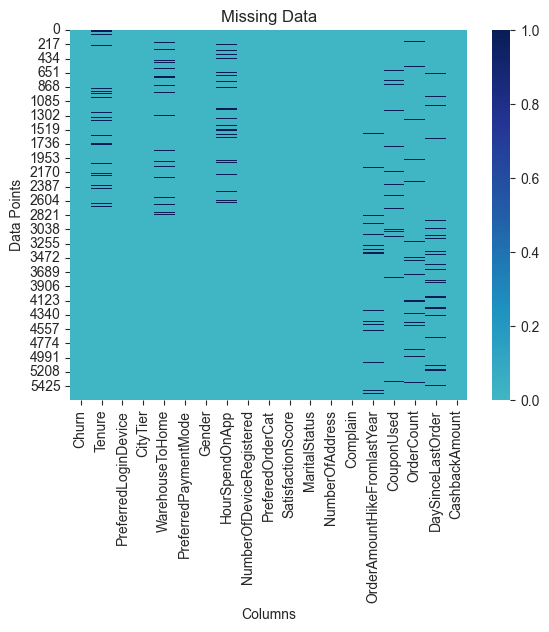

In [16]:
# Visualizing Missing Values

sns.heatmap(df.isnull(), cmap = "YlGnBu", center = 0).set(title = 'Missing Data', 
                                                          xlabel = 'Columns', 
                                                          ylabel = 'Data Points');

In [17]:
# Separating Null columns 

null_columns = []

for i in df.columns:
    if df[i].isnull().sum() > 0:
        null_columns.append(i)
            
print('Columns with null values = ', null_columns)

Columns with null values =  ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']


In [18]:
df[null_columns]

Tenure  WarehouseToHome  HourSpendOnApp  OrderAmountHikeFromlastYear  \
0        4.0              6.0             3.0                         11.0   
1        NaN              8.0             3.0                         15.0   
2        NaN             30.0             2.0                         14.0   
3        0.0             15.0             2.0                         23.0   
4        0.0             12.0             NaN                         11.0   
...      ...              ...             ...                          ...   
5625    10.0             30.0             3.0                         18.0   
5626    13.0             13.0             3.0                         16.0   
5627     1.0             11.0             3.0                         21.0   
5628    23.0              9.0             4.0                         15.0   
5629     8.0             15.0             3.0                         13.0   

      CouponUsed  OrderCount  DaySinceLastOrder  
0            1.0         1.0                5.0  
1            0.0         1.0                0.0  
2            0.0         1.0                3.0  
3            0.0         1.0                3.0  
4            1.0         1.0                3.0  
...          ...         ...                ...  
5625         1.0         2.0                4.0  
5626         1.0         2.0                NaN  
5627         1.0         2.0                4.0  
5628         2.0         2.0                9.0  
5629         2.0         2.0                3.0  

[5630 rows x 7 columns]

## Imputing Missing Values 

#### Imputing Missing Values of __'Tenure'__ column

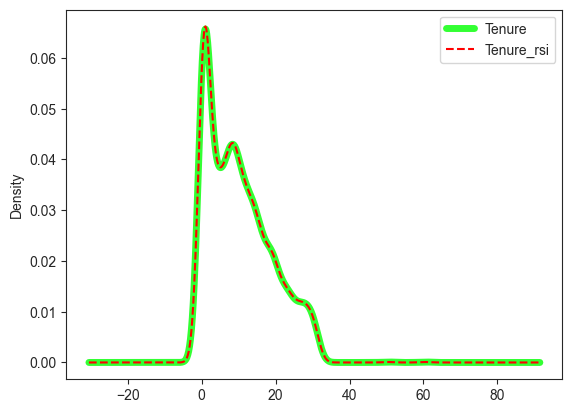

In [19]:
from feature_engine.imputation import RandomSampleImputer
rsi = RandomSampleImputer()

df['Tenure_rsi'] = rsi.fit_transform(df[['Tenure']])

df['Tenure'].plot(kind = 'kde', color = 'lime', linewidth = 5, alpha = .8)
df['Tenure_rsi'].plot(kind = 'kde', color = 'red', linestyle = '--')
plt.legend();

From the distribution plot it's clear that, the data distribution of __'Tenure'__ column, before and after imputation of the null values are exactly same. So, we can impute the null values of __'Tenure'__ column by Random Sample Imputation technique. 

In [20]:
# dropping unnecessary test column from the dataframe
df = df.drop(['Tenure_rsi'], axis = 1)

# imputing the null values
df['Tenure'] = rsi.fit_transform(df[['Tenure']])

# checking whether replacement is successful or not
df['Tenure'].isnull().sum()

0

#### Imputing Missing Values of __'WarehouseToHome'__ column 

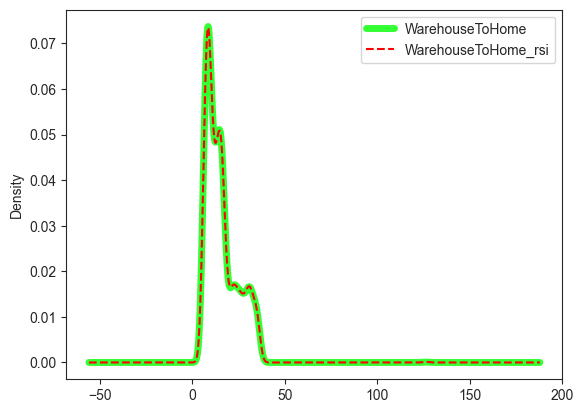

In [21]:
from feature_engine.imputation import RandomSampleImputer
rsi = RandomSampleImputer()

df['WarehouseToHome_rsi'] = rsi.fit_transform(df[['WarehouseToHome']])

df['WarehouseToHome'].plot(kind = 'kde', color = 'lime', linewidth = 5, alpha = .8)
df['WarehouseToHome_rsi'].plot(kind = 'kde', color = 'red', linestyle = '--')
plt.legend();

In [22]:
# dropping unnecessary test column from the dataframe
df = df.drop(['WarehouseToHome_rsi'], axis = 1)

# imputing the null values
df['WarehouseToHome'] = rsi.fit_transform(df[['WarehouseToHome']])

# checking whether replacement is successful or not
df['WarehouseToHome'].isnull().sum()

0

#### Imputing Missing Values of __'HourSpendOnApp'__ column 

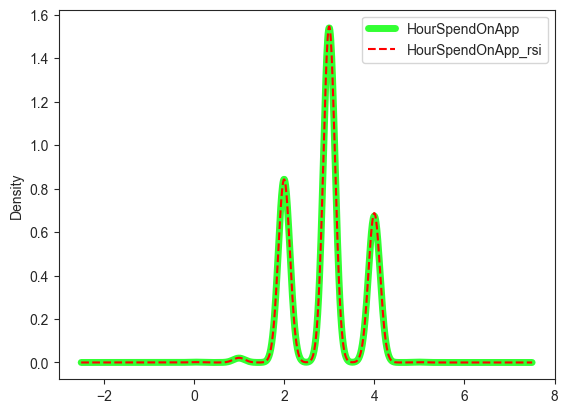

In [23]:
from feature_engine.imputation import RandomSampleImputer
rsi = RandomSampleImputer()

df['HourSpendOnApp_rsi'] = rsi.fit_transform(df[['HourSpendOnApp']])

df['HourSpendOnApp'].plot(kind = 'kde', color = 'lime', linewidth = 5, alpha = .8)
df['HourSpendOnApp_rsi'].plot(kind = 'kde', color = 'red', linestyle = '--')
plt.legend();

In [24]:
# dropping unnecessary test column from the dataframe
df = df.drop(['HourSpendOnApp_rsi'], axis = 1)

# imputing the null values
df['HourSpendOnApp'] = rsi.fit_transform(df[['HourSpendOnApp']])

# checking whether replacement is successful or not
df['HourSpendOnApp'].isnull().sum()

0

#### Imputing Missing Values of __'OrderAmountHikeFromlastYear'__ column 

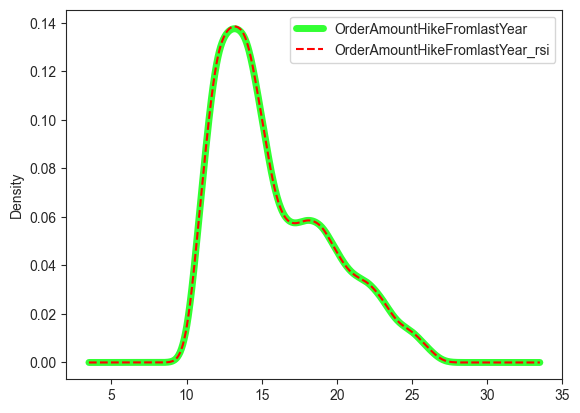

In [25]:
from feature_engine.imputation import RandomSampleImputer
rsi = RandomSampleImputer()

df['OrderAmountHikeFromlastYear_rsi'] = rsi.fit_transform(df[['OrderAmountHikeFromlastYear']])

df['OrderAmountHikeFromlastYear'].plot(kind = 'kde', color = 'lime', linewidth = 5, alpha = .8)
df['OrderAmountHikeFromlastYear_rsi'].plot(kind = 'kde', color = 'red', linestyle = '--')
plt.legend();

In [26]:
# dropping unnecessary test column from the dataframe
df = df.drop(['OrderAmountHikeFromlastYear_rsi'], axis = 1)

# imputing the null values
df['OrderAmountHikeFromlastYear'] = rsi.fit_transform(df[['OrderAmountHikeFromlastYear']])

# checking whether replacement is successful or not
df['OrderAmountHikeFromlastYear'].isnull().sum()

0

#### Imputing Missing Values of __'CouponUsed'__ column 

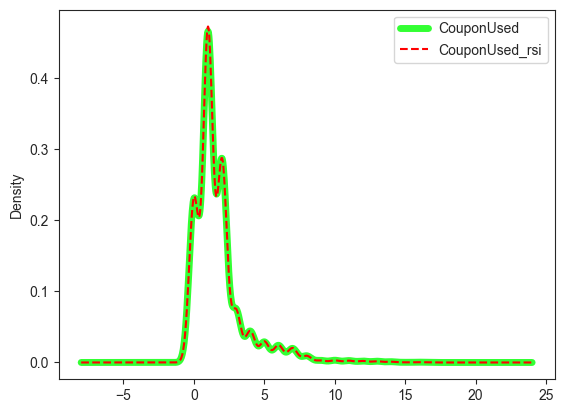

In [27]:
from feature_engine.imputation import RandomSampleImputer
rsi = RandomSampleImputer()

df['CouponUsed_rsi'] = rsi.fit_transform(df[['CouponUsed']])

df['CouponUsed'].plot(kind = 'kde', color = 'lime', linewidth = 5, alpha = .8)
df['CouponUsed_rsi'].plot(kind = 'kde', color = 'red', linestyle = '--')
plt.legend();

In [28]:
# dropping unnecessary test column from the dataframe
df = df.drop(['CouponUsed_rsi'], axis = 1)

# imputing the null values
df['CouponUsed'] = rsi.fit_transform(df[['CouponUsed']])

# checking whether replacement is successful or not
df['CouponUsed'].isnull().sum()

0

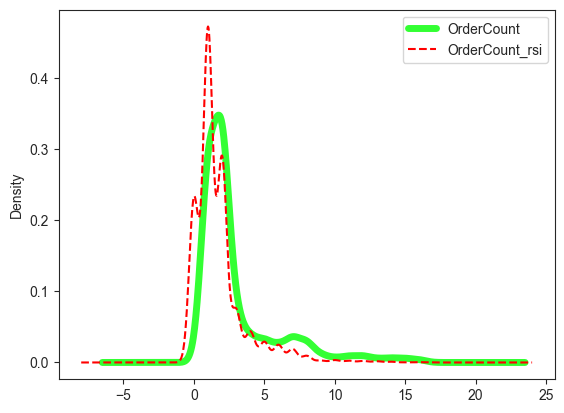

In [29]:
from feature_engine.imputation import RandomSampleImputer
rsi = RandomSampleImputer()

df['OrderCount_rsi'] = rsi.fit_transform(df[['CouponUsed']])

df['OrderCount'].plot(kind = 'kde', color = 'lime', linewidth = 5, alpha = .8)
df['OrderCount_rsi'].plot(kind = 'kde', color = 'red', linestyle = '--')
plt.legend();

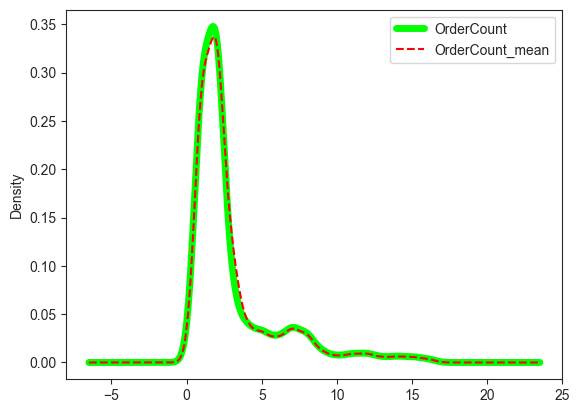

In [30]:
df['OrderCount_mean'] = df['OrderCount'].transform(lambda x : x.fillna(x.mean()))

df['OrderCount'].plot(kind = 'kde', color = 'lime', linewidth = 5)
df['OrderCount_mean'].plot(kind = 'kde', color = 'red', linestyle = '--')
plt.legend();

In [31]:
# dropping unnecessary test column from the dataframe
df = df.drop(['OrderCount_rsi', 'OrderCount_mean'], axis = 1)

# imputing the null values
df['OrderCount'] = df['OrderCount'].transform(lambda x : x.fillna(x.mean()))

# checking whether replacement is successful or not
df['OrderCount'].isnull().sum()

0

#### Imputing Missing Values of 'DaySinceLastOrder' column¶

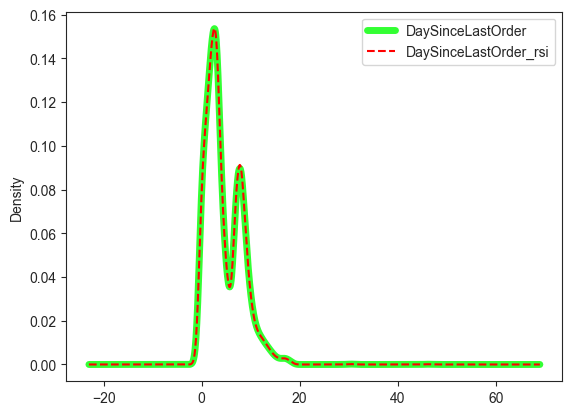

In [32]:
from feature_engine.imputation import RandomSampleImputer
rsi = RandomSampleImputer()

df['DaySinceLastOrder_rsi'] = rsi.fit_transform(df[['DaySinceLastOrder']])

df['DaySinceLastOrder'].plot(kind = 'kde', color = 'lime', linewidth = 5, alpha = .8)
df['DaySinceLastOrder_rsi'].plot(kind = 'kde', color = 'red', linestyle = '--')
plt.legend();

In [33]:
# dropping unnecessary test column from the dataframe
df = df.drop(['DaySinceLastOrder_rsi'], axis = 1)

# imputing the null values
df['DaySinceLastOrder'] = rsi.fit_transform(df[['DaySinceLastOrder']])

# checking whether replacement is successful or not
df['DaySinceLastOrder'].isnull().sum()

0

Checking whether all the missing values of the dataset have been imputed or not :  

In [34]:
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

There is no null records anymore in our dataset.

### Sample of the final dataset 

In [35]:
df.sample(5)

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
2373      0    10.0         Mobile Phone         1             11.0   
1382      0    19.0         Mobile Phone         3              8.0   
4672      0     1.0         Mobile Phone         1             10.0   
4035      0     9.0         Mobile Phone         1             23.0   
5068      0     7.0         Mobile Phone         3             17.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
2373          Credit Card    Male             2.0                         1   
1382             E wallet  Female             3.0                         3   
4672          Credit Card    Male             3.0                         5   
4035                  UPI  Female             3.0                         5   
5068             E wallet    Male             3.0                         2   

        PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
2373        Mobile Phone                  3       Married                3   
1382        Mobile Phone                  1       Married                2   
4672        Mobile Phone                  1        Single                2   
4035  Laptop & Accessory                  4       Married                2   
5068             Fashion                  3       Married                2   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
2373         1                         12.0         0.0         1.0   
1382         0                         13.0         2.0         2.0   
4672         0                         14.0         2.0         2.0   
4035         1                         12.0         2.0         2.0   
5068         1                         15.0         1.0         2.0   

      DaySinceLastOrder  CashbackAmount  
2373                3.0          121.27  
1382                2.0          120.14  
4672                2.0          145.45  
4035                3.0          172.88  
5068                9.0          208.80

In [36]:
# from pandas_profiling import ProfileReport 
# ProfileReport(df)

<a id = "EDA"></a>

# __EDA (Exploratory Data Analysis)__

<a id = "UACF"></a>

# a) Univariate Analysis of Categorical Features

### Checking the counts of all the unique values of each Categorical Feature

In [37]:
for i in cat_columns:
    print(df[i].value_counts(), '\n')

PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64 

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64 

Gender
Male      3384
Female    2246
Name: count, dtype: int64 

PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64 

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64 



### Descriptive Statistics of Categorical Features

In [38]:
df.describe(include = 'O').T

count unique           top  freq
PreferredLoginDevice  5630      2  Mobile Phone  3996
PreferredPaymentMode  5630      5    Debit Card  2314
Gender                5630      2          Male  3384
PreferedOrderCat      5630      5  Mobile Phone  2080
MaritalStatus         5630      3       Married  2986

__Observations:__

1. Mobile phone is more preferred login device than computer. 
1. Among the 5 types of Payment Methods, Debit Card is the most preferred. 
1. Most of the customers are Male. 
1. Among the 5 types of Order Categories, Mobile Phone is the dominant order category. 
1. Most of the customers are married.

These infos will help in targeting the audiences for advertizing purpose. 

## Visualization of the Counts of different unique categories of each categorical feature

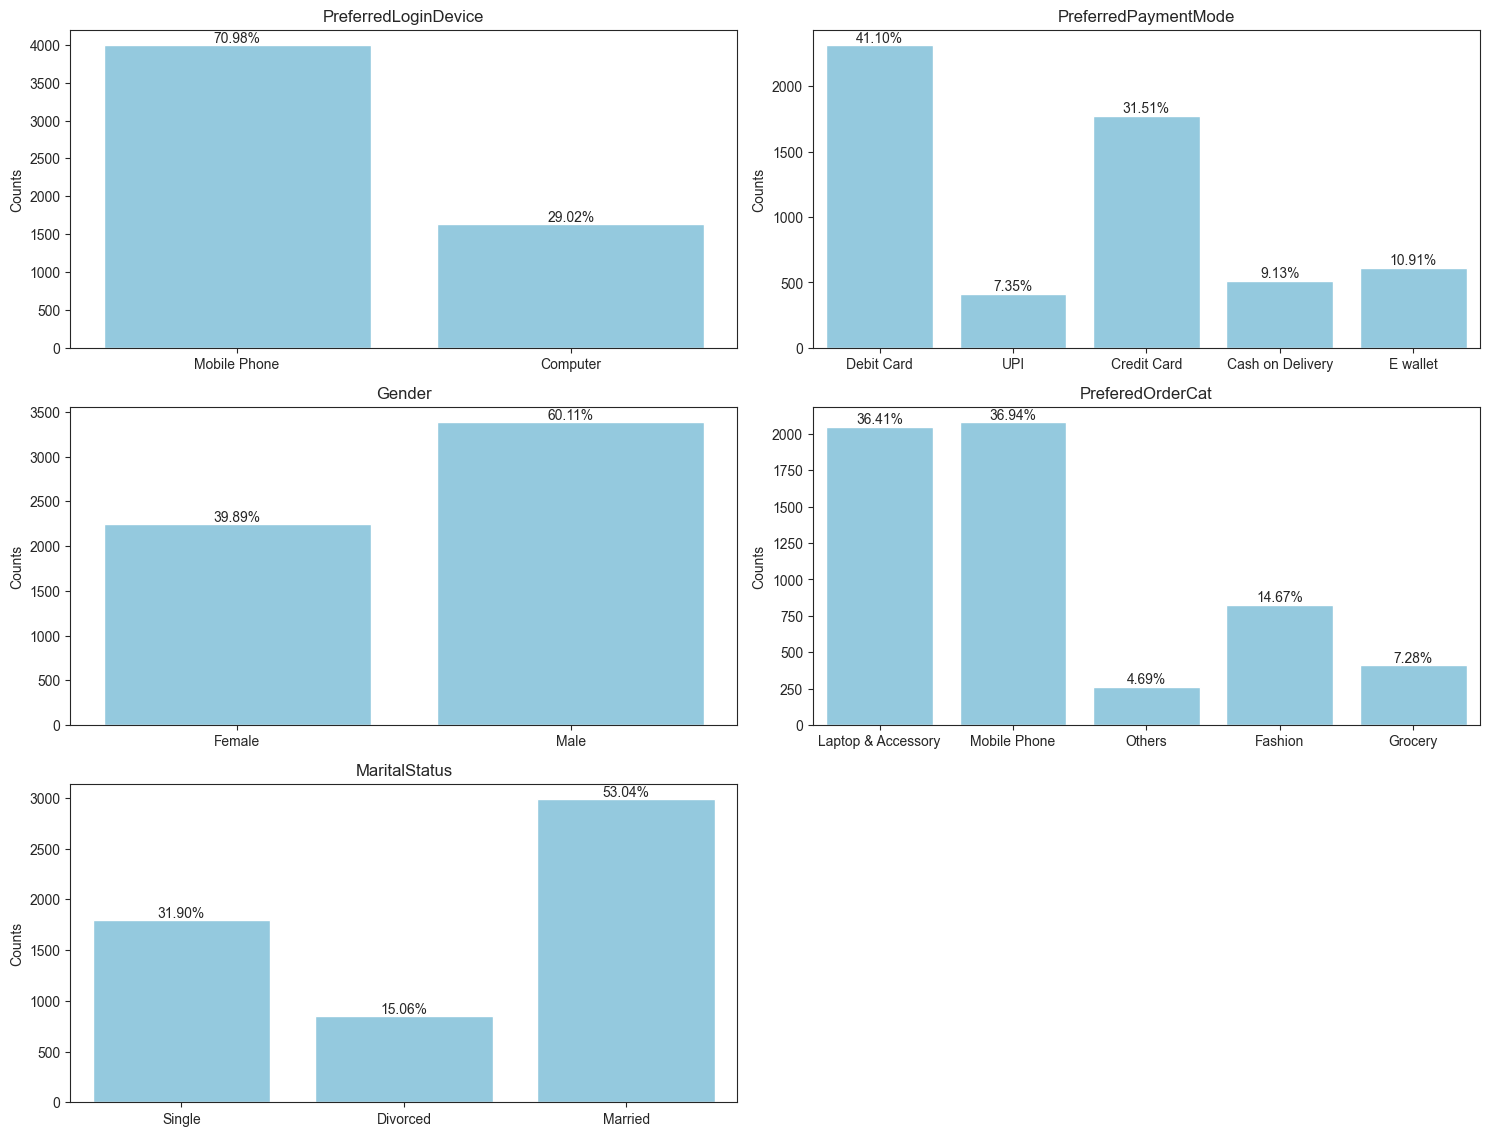

In [39]:
plt.figure(figsize = (15, 15))
def count_plot(column, row_serial, column_serial, fig_serial):
    plt.subplot(row_serial, column_serial, fig_serial)
    ax = sns.countplot(data = df, x = column, color = 'skyblue')
    total = df[column].count()
    ax.bar_label(ax.containers[0], fmt = lambda x : f'{(x/total)*100:.2f}%')
    plt.title(column, size = 12)
    plt.xlabel(None)
    plt.ylabel('Counts', size = 10)
    plt.xticks(size = 10, rotation = 0)
    plt.yticks(size = 10, rotation = 0)
    plt.tight_layout()

column = cat_columns
row_serial = [4, 4, 4, 4, 4, 4, 4, 4]
column_serial = [2, 2, 2, 2, 2, 2, 2, 2]
fig_serial = [1, 2, 3, 4, 5, 6, 7, 8]

for i, j, k, p in zip(column, row_serial, column_serial, fig_serial):
    count_plot(i, j, k, p)

<a id = "UANF"></a>

# b) Univariate Analysis of Numerical Features

### Descriptive Statistics of Numerical Features

In [40]:
df.describe().T

count        mean        std   min     25%  \
Churn                        5630.0    0.168384   0.374240   0.0    0.00   
Tenure                       5630.0   10.176021   8.557130   0.0    2.00   
CityTier                     5630.0    1.654707   0.915389   1.0    1.00   
WarehouseToHome              5630.0   15.680639   8.762351   5.0    9.00   
HourSpendOnApp               5630.0    2.934991   0.722480   0.0    2.00   
NumberOfDeviceRegistered     5630.0    3.688988   1.023999   1.0    3.00   
SatisfactionScore            5630.0    3.066785   1.380194   1.0    2.00   
NumberOfAddress              5630.0    4.214032   2.583586   1.0    2.00   
Complain                     5630.0    0.284902   0.451408   0.0    0.00   
OrderAmountHikeFromlastYear  5630.0   15.711901   3.675714  11.0   13.00   
CouponUsed                   5630.0    1.747247   1.888589   0.0    1.00   
OrderCount                   5630.0    3.008004   2.871521   1.0    1.00   
DaySinceLastOrder            5630.0    4.546536   3.680752   0.0    2.00   
CashbackAmount               5630.0  177.223030  49.207036   0.0  145.77   

                                50%         75%     max  
Churn                          0.00    0.000000    1.00  
Tenure                         9.00   16.000000   61.00  
CityTier                       1.00    3.000000    3.00  
WarehouseToHome               14.00   20.000000  127.00  
HourSpendOnApp                 3.00    3.000000    5.00  
NumberOfDeviceRegistered       4.00    4.000000    6.00  
SatisfactionScore              3.00    4.000000    5.00  
NumberOfAddress                3.00    6.000000   22.00  
Complain                       0.00    1.000000    1.00  
OrderAmountHikeFromlastYear   15.00   18.000000   26.00  
CouponUsed                     1.00    2.000000   16.00  
OrderCount                     2.00    3.008004   16.00  
DaySinceLastOrder              3.00    7.000000   46.00  
CashbackAmount               163.28  196.392500  324.99

__Observations:__

1. 50% of the customers registerd in 4 or less devices.
1. 75% of the customers spend 3 or less hours on App. 
1. Satisfaction Score was scaled from 1 to 5 ; Mean Satisfaction Score = 3. 
1. Mean Order Count = 3 ; 50% of the customers order less than or equal to 2 No. of times. 
1. 75% of the customers used less than or equal to 2 No. of coupons. 

### Checking the counts of all the unique values of each Numerical Feature

In [41]:
for i in num_columns:
    print(df[i].value_counts(), '\n')

Churn
0    4682
1     948
Name: count, dtype: int64 

Tenure
1.0     731
0.0     536
8.0     273
9.0     255
7.0     234
10.0    220
5.0     216
4.0     212
11.0    205
3.0     202
13.0    191
6.0     190
12.0    190
14.0    186
2.0     174
15.0    167
16.0    160
19.0    147
18.0    131
20.0    113
17.0    110
23.0     95
21.0     90
22.0     78
24.0     77
28.0     72
30.0     71
27.0     68
26.0     62
29.0     59
25.0     59
31.0     52
50.0      1
60.0      1
51.0      1
61.0      1
Name: count, dtype: int64 

CityTier
1    3666
3    1722
2     242
Name: count, dtype: int64 

WarehouseToHome
9.0      583
8.0      457
7.0      409
16.0     343
14.0     314
6.0      306
15.0     301
10.0     290
13.0     263
11.0     246
12.0     229
17.0     229
22.0     108
31.0     106
30.0     100
23.0      99
35.0      98
32.0      97
26.0      95
25.0      91
18.0      91
21.0      89
24.0      86
29.0      84
27.0      83
20.0      80
19.0      79
28.0      74
33.0      71
34.0      63
36.0  

__Observations:__

1. Among 5630 customers, 948 have churned. 
1. Most of the customers are from City Tier 1 (3666). 
1. 2866 No. of customers spend 3 hours on app. 
1. Among 5630 customers, 1604 provide complain.

## Data Distribution of Numerical Features

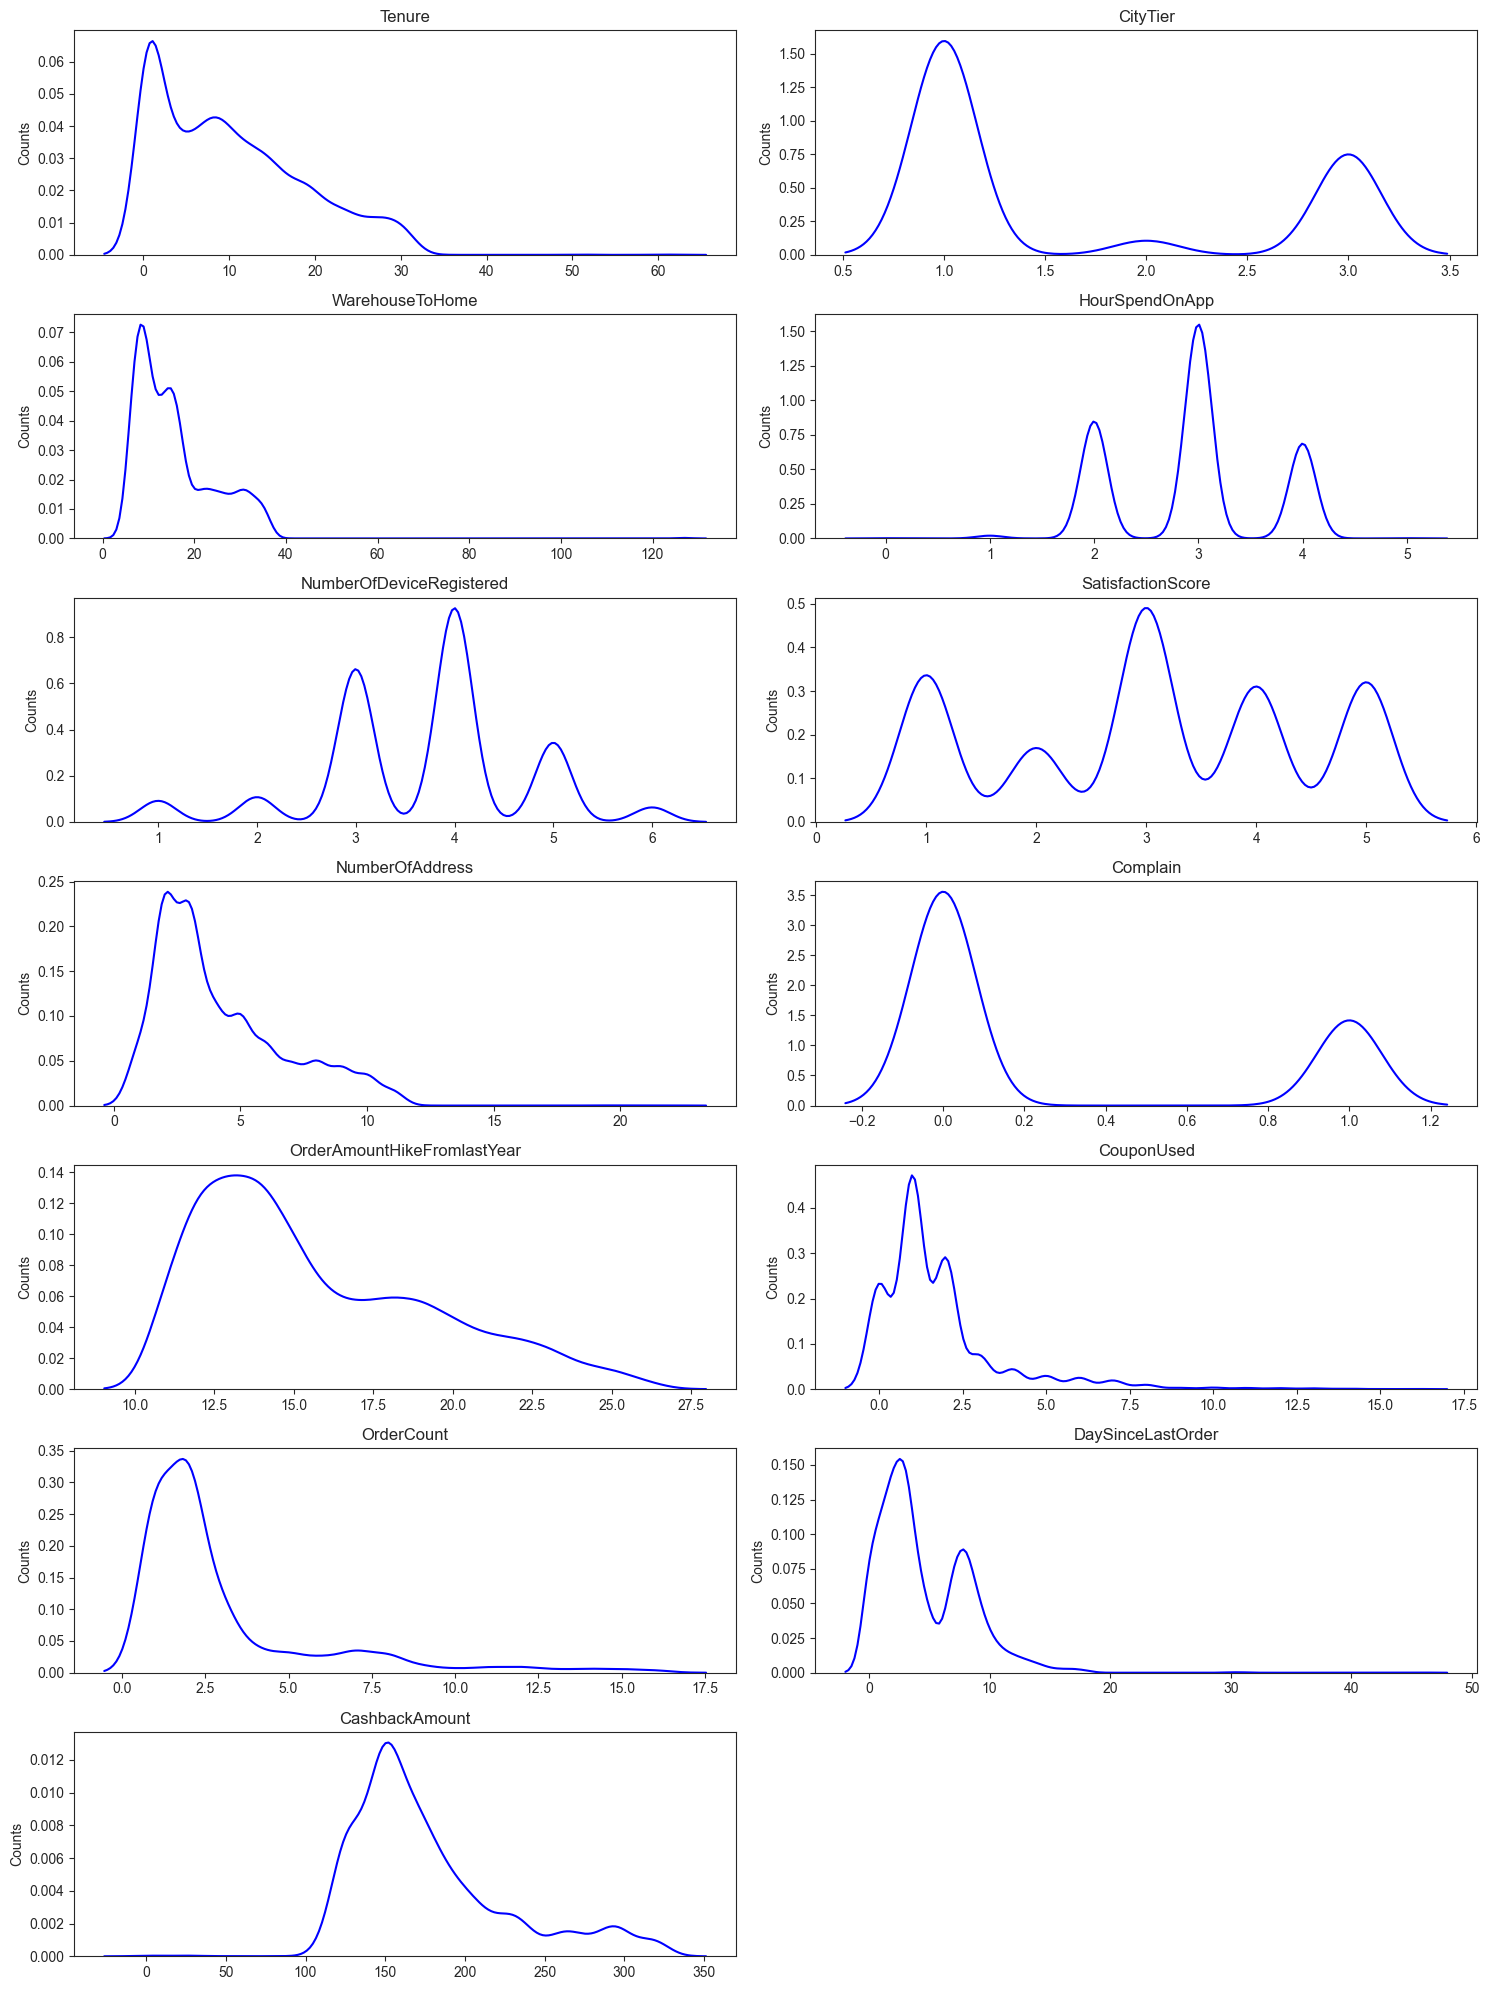

In [42]:
plt.figure(figsize = (15, 20))
def count_plot(column, row_serial, column_serial, fig_serial):
    plt.subplot(row_serial, column_serial, fig_serial)
    ax = sns.kdeplot(df , x = column, color = 'b')
    plt.title(column, size = 12)
    plt.xlabel(None)
    plt.ylabel('Counts', size = 10)
    plt.xticks(size = 10, rotation = 0)
    plt.yticks(size = 10, rotation = 0)
    plt.tight_layout()

column = [i for i in num_columns if i not in ("Churn")]
row_serial = [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
column_serial = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
fig_serial = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

for i, j, k, p in zip(column, row_serial, column_serial, fig_serial):
    count_plot(i, j, k, p)

<a id = "outliers"></a>

## Finding Outliers 

In [43]:
def find_outliers(features):
    q1 = df[features].quantile(0.25)
    q3 = df[features].quantile(0.75)
    IQR = q3-q1
    outliers = df[((df[features] < (q1-1.5*IQR)) | (df[features] > (q3+1.5*IQR)))][features]
    
    print("Feature Name : ", features, '\n')
    print("number of outliers: ", len(outliers), '\n')
    print("max outlier value: ", outliers.max(), '\n')
    print("min outlier value: ", outliers.min(), '\n')
    print("-----------------------------")
    
features = num_columns
for i in features:
    find_outliers(i)

Feature Name :  Churn 

number of outliers:  948 

max outlier value:  1 

min outlier value:  1 

-----------------------------
Feature Name :  Tenure 

number of outliers:  4 

max outlier value:  61.0 

min outlier value:  50.0 

-----------------------------
Feature Name :  CityTier 

number of outliers:  0 

max outlier value:  nan 

min outlier value:  nan 

-----------------------------
Feature Name :  WarehouseToHome 

number of outliers:  4 

max outlier value:  127.0 

min outlier value:  126.0 

-----------------------------
Feature Name :  HourSpendOnApp 

number of outliers:  6 

max outlier value:  5.0 

min outlier value:  0.0 

-----------------------------
Feature Name :  NumberOfDeviceRegistered 

number of outliers:  397 

max outlier value:  6 

min outlier value:  1 

-----------------------------
Feature Name :  SatisfactionScore 

number of outliers:  0 

max outlier value:  nan 

min outlier value:  nan 

-----------------------------
Feature Name :  NumberOfAdd

__Observations:__

- There are more than 400 Outlier values in the CashbackAmount feature. 
- 700 Outliers in Order Count feature. 
- 650 Outliers in Coupon Used Column. 

These outliers are not abnormal at all ; Since, choices and requirements varies from customer to customer. 


## Visualizing Outliers 

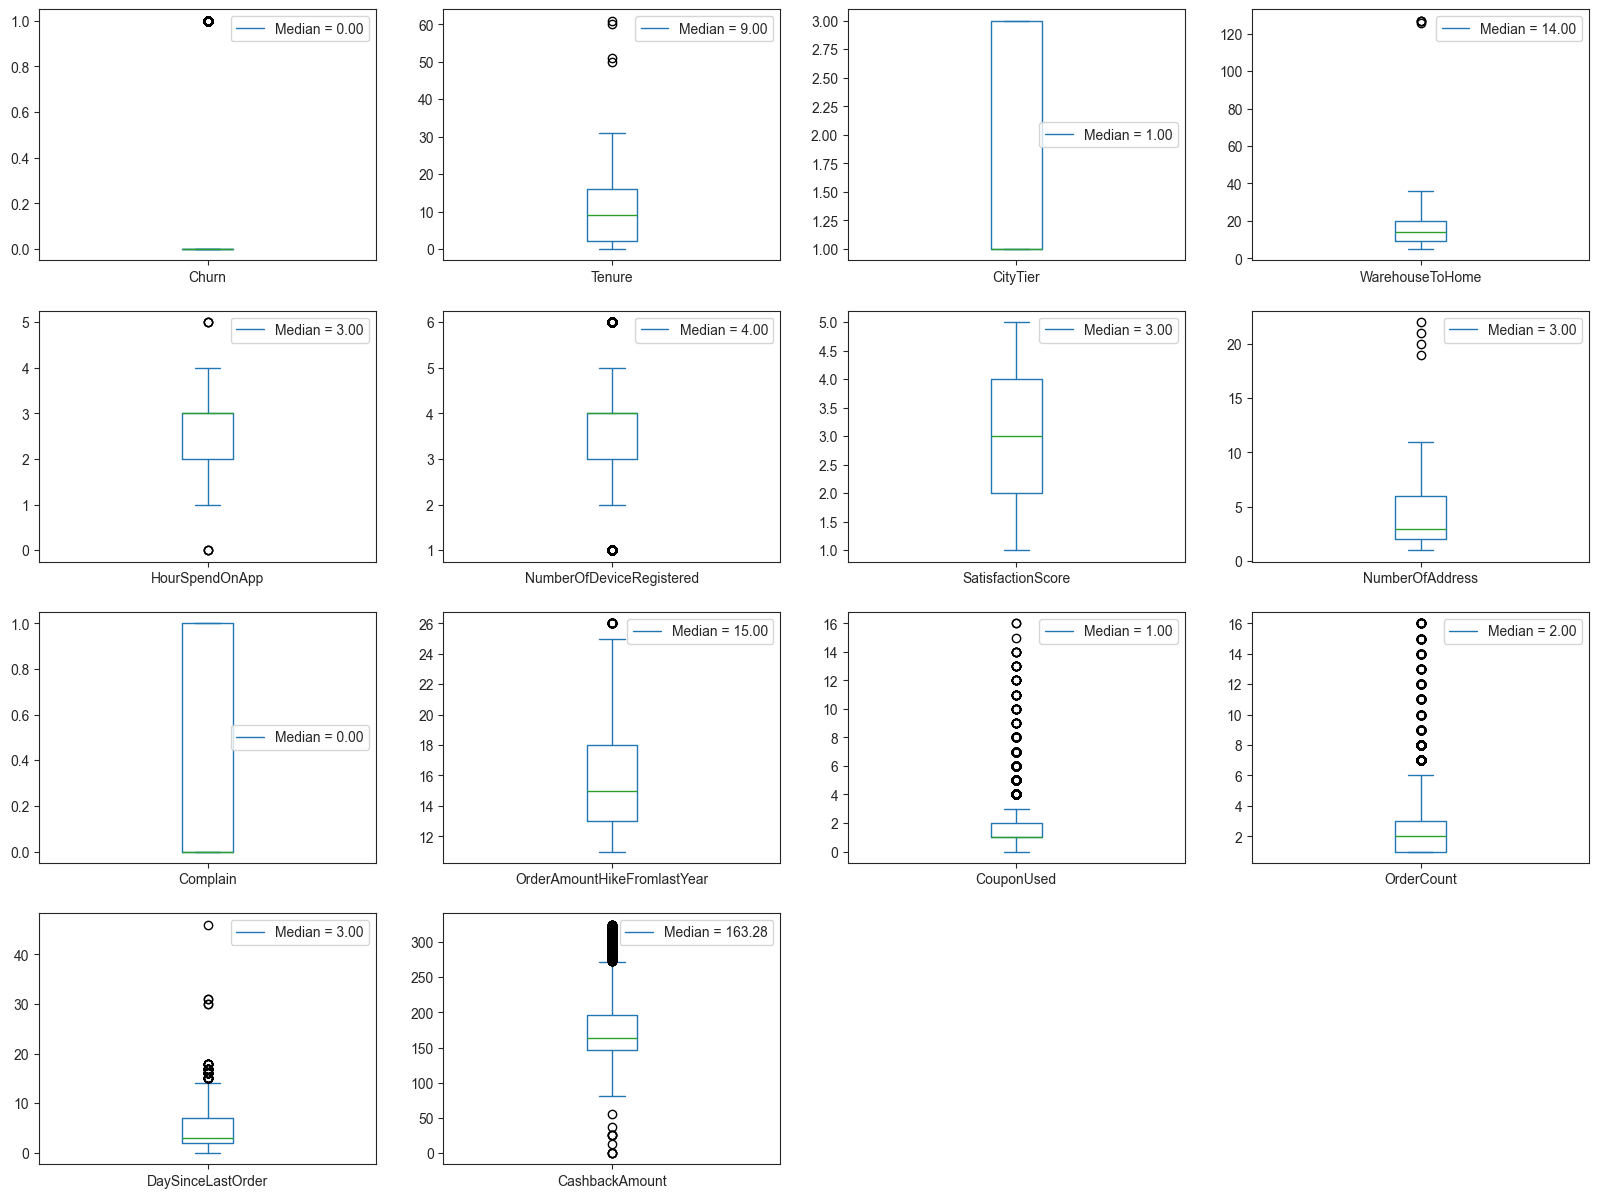

In [44]:
plt.figure(figsize = (20, 15))

def outliers(columns, row_serial, column_serial, fig_serial):
    plt.subplot(row_serial, column_serial, fig_serial)
    df[columns].plot(kind = 'box')
    plt.legend(['Median = {:.2f}'.format(df[columns].median())], loc = 'best')

columns = num_columns
column_serial = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
row_serial = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
fig_serial = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

for i, j, k, p in zip(columns, row_serial, column_serial, fig_serial):
    outliers(i, j, k, p)

## Analyzing the __'Churn'__ feature 

### Customers who did churn vs. who did not churn

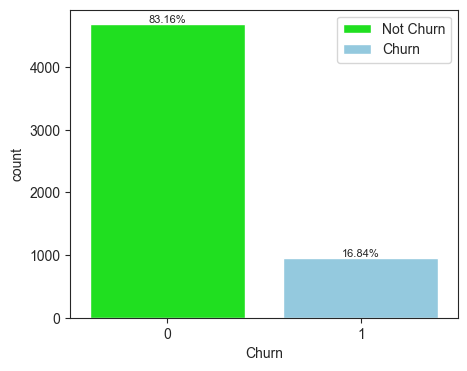

In [45]:
plt.figure(figsize = (5, 4))
ax = sns.countplot(data = df, x = 'Churn', ec = 'white', hue = 'Churn', palette = ['lime', 'skyblue'])
ax.legend(labels = ['Not Churn', 'Churn'])
total = df['Churn'].count()
ax.bar_label(ax.containers[0], fmt = lambda x : f'{(x/total)*100:.2f}%', size = 8)
ax.bar_label(ax.containers[1], fmt = lambda x : f'{(x/total)*100:.2f}%', size = 8);

__Observations:__

- 83% of the customers of this dataset were Not Churn; whereas, 17% of the customers were Churn. 


# c) Bivariate & Multivariate Analysis 

## 1. with respect to 'Churn' Feature 

### Relationship between Categorical Features & __'Churn'__ feature

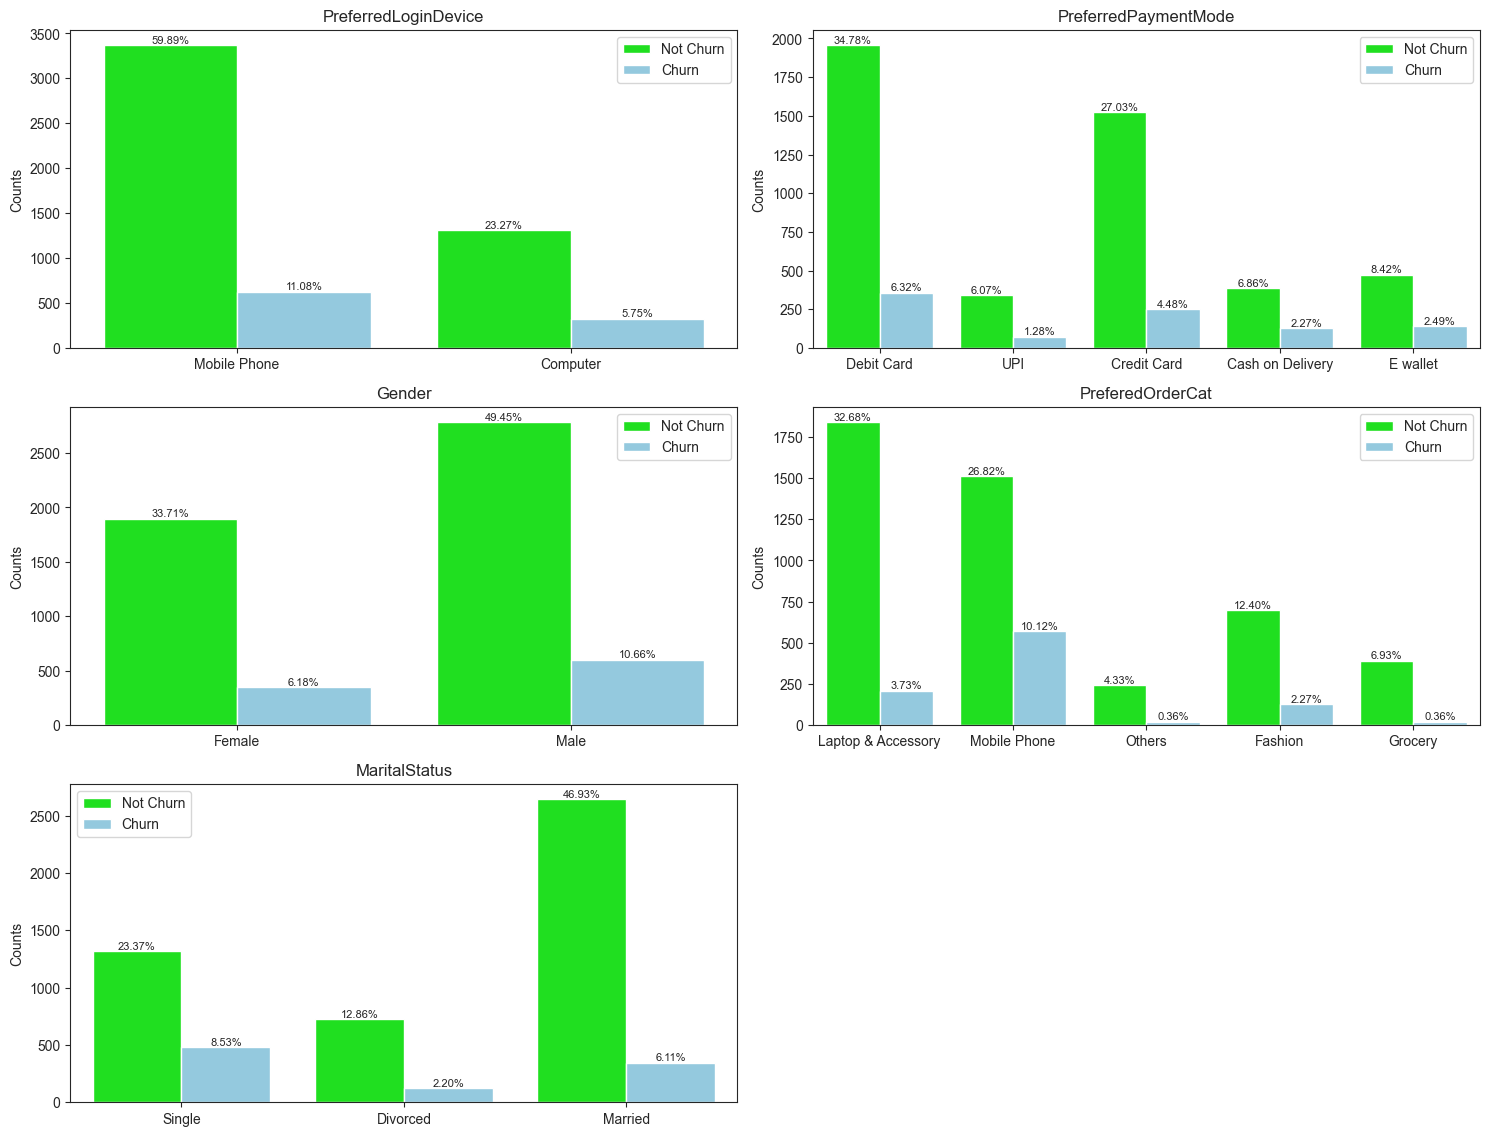

In [46]:
plt.figure(figsize = (15, 15))
def count_plot(column, row_serial, column_serial, fig_serial):
    plt.subplot(row_serial, column_serial, fig_serial)
    total = df[column].count()
    ax = sns.countplot(data = df, x = column, hue = 'Churn', palette = ['lime', 'skyblue'])
    ax.bar_label(ax.containers[0], fmt = lambda x : f'{(x/total)*100:.2f}%', size = 8)
    ax.bar_label(ax.containers[1], fmt = lambda x : f'{(x/total)*100:.2f}%', size = 8)
    plt.title(column, size = 12)
    plt.xlabel(None)
    plt.ylabel('Counts', size = 10)
    plt.xticks(size = 10, rotation = 0)
    plt.yticks(size = 10, rotation = 0)
    ax.legend(labels = ['Not Churn', 'Churn'])
    plt.tight_layout()

column = cat_columns
row_serial = [4, 4, 4, 4, 4, 4, 4, 4]
column_serial = [2, 2, 2, 2, 2, 2, 2, 2]
fig_serial = [1, 2, 3, 4, 5, 6, 7, 8]

for i, j, k, p in zip(column, row_serial, column_serial, fig_serial):
    count_plot(i, j, k, p)

### Churn rate of different marital status of male and female

In [47]:
df.groupby(['Gender', 'MaritalStatus', 'Churn'])[['Churn']].count()

Churn
Gender MaritalStatus Churn       
Female Divorced      0        300
                     1         48
       Married       0       1028
                     1        112
       Single        0        570
                     1        188
Male   Divorced      0        424
                     1         76
       Married       0       1614
                     1        232
       Single        0        746
                     1        292

### Churn rate of different Satisfaction Score 

In [48]:
df.groupby('Churn')['SatisfactionScore'].value_counts()

Churn  SatisfactionScore
0      3                    1406
       1                    1030
       4                     890
       5                     844
       2                     512
1      3                     292
       5                     264
       4                     184
       1                     134
       2                      74
Name: count, dtype: int64

Among the Churned customers, there are satisfaction scores of 3, 5, 4. It seems like, Churn or not Churn does not depend that much on Satisfaction Scores. 

### Separating the distribution of Numerical Features based on 'Churn' & 'Not Churn'

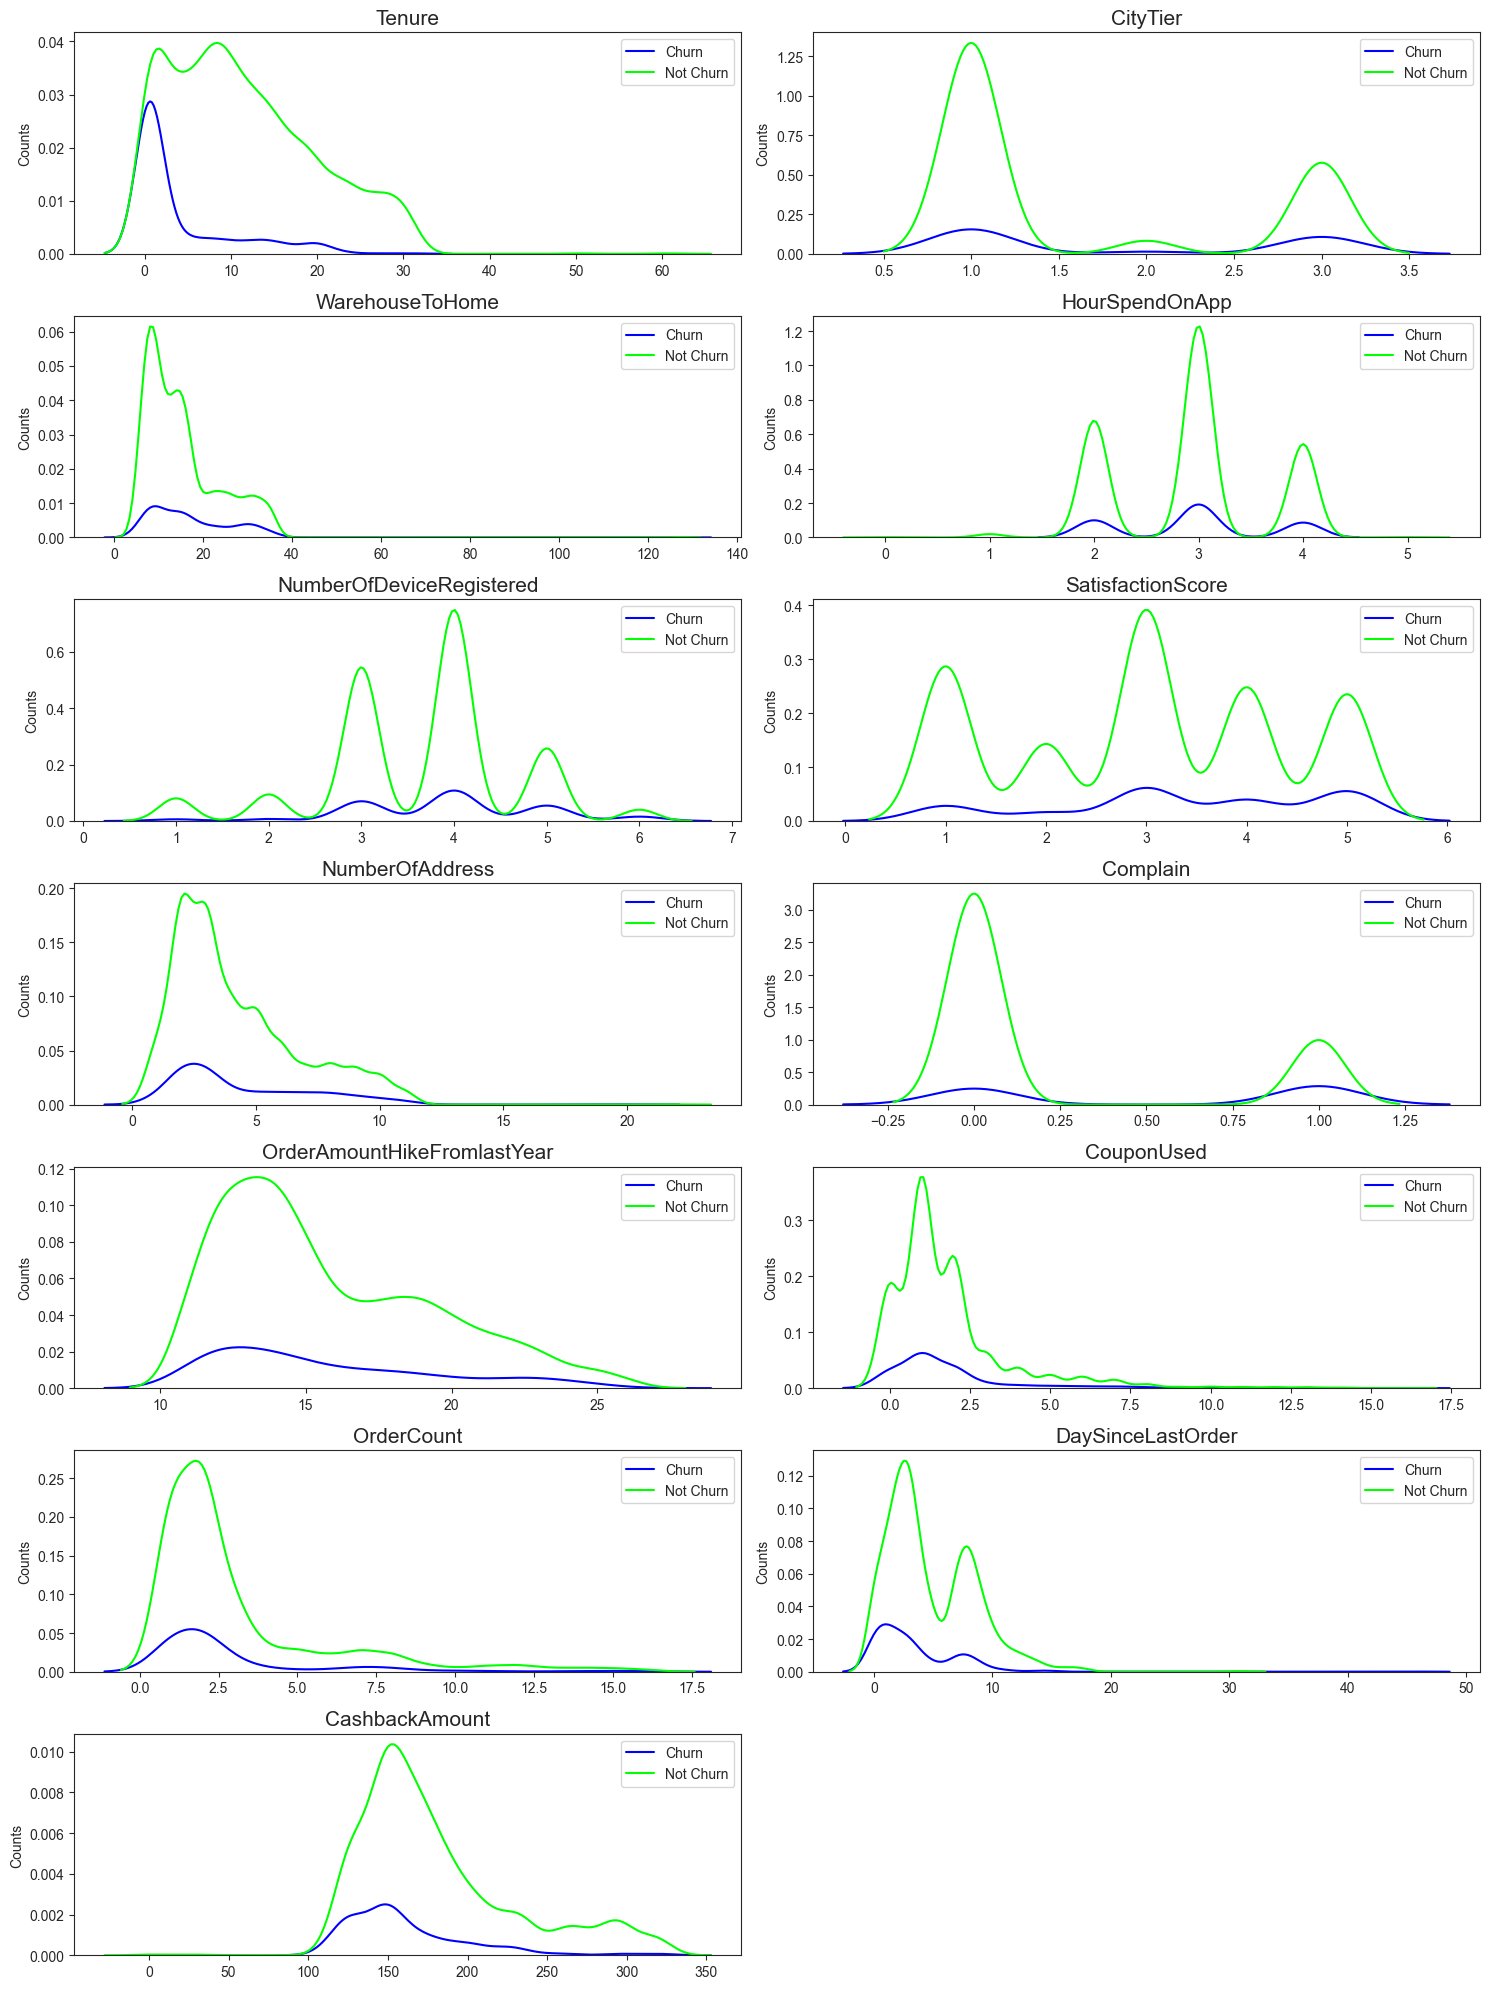

In [49]:
plt.figure(figsize = (15, 20))
def count_plot(column, row_serial, column_serial, fig_serial):
    plt.subplot(row_serial, column_serial, fig_serial)
    ax = sns.kdeplot(df , x = column, hue = 'Churn', palette = ['lime', 'b'])
    plt.title(column, size = 15)
    plt.legend(['Churn', 'Not Churn'])
    plt.xlabel(None)
    plt.ylabel('Counts', size = 10)
    plt.xticks(size = 10, rotation = 0)
    plt.yticks(size = 10, rotation = 0)
    plt.tight_layout()

column = [i for i in num_columns if i not in ("Churn")]
row_serial = [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
column_serial = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
fig_serial = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

for i, j, k, p in zip(column, row_serial, column_serial, fig_serial):
    count_plot(i, j, k, p)

## 2. with respect to 'OrderCount' feature
### Mean Order Count of different Categorical Features 

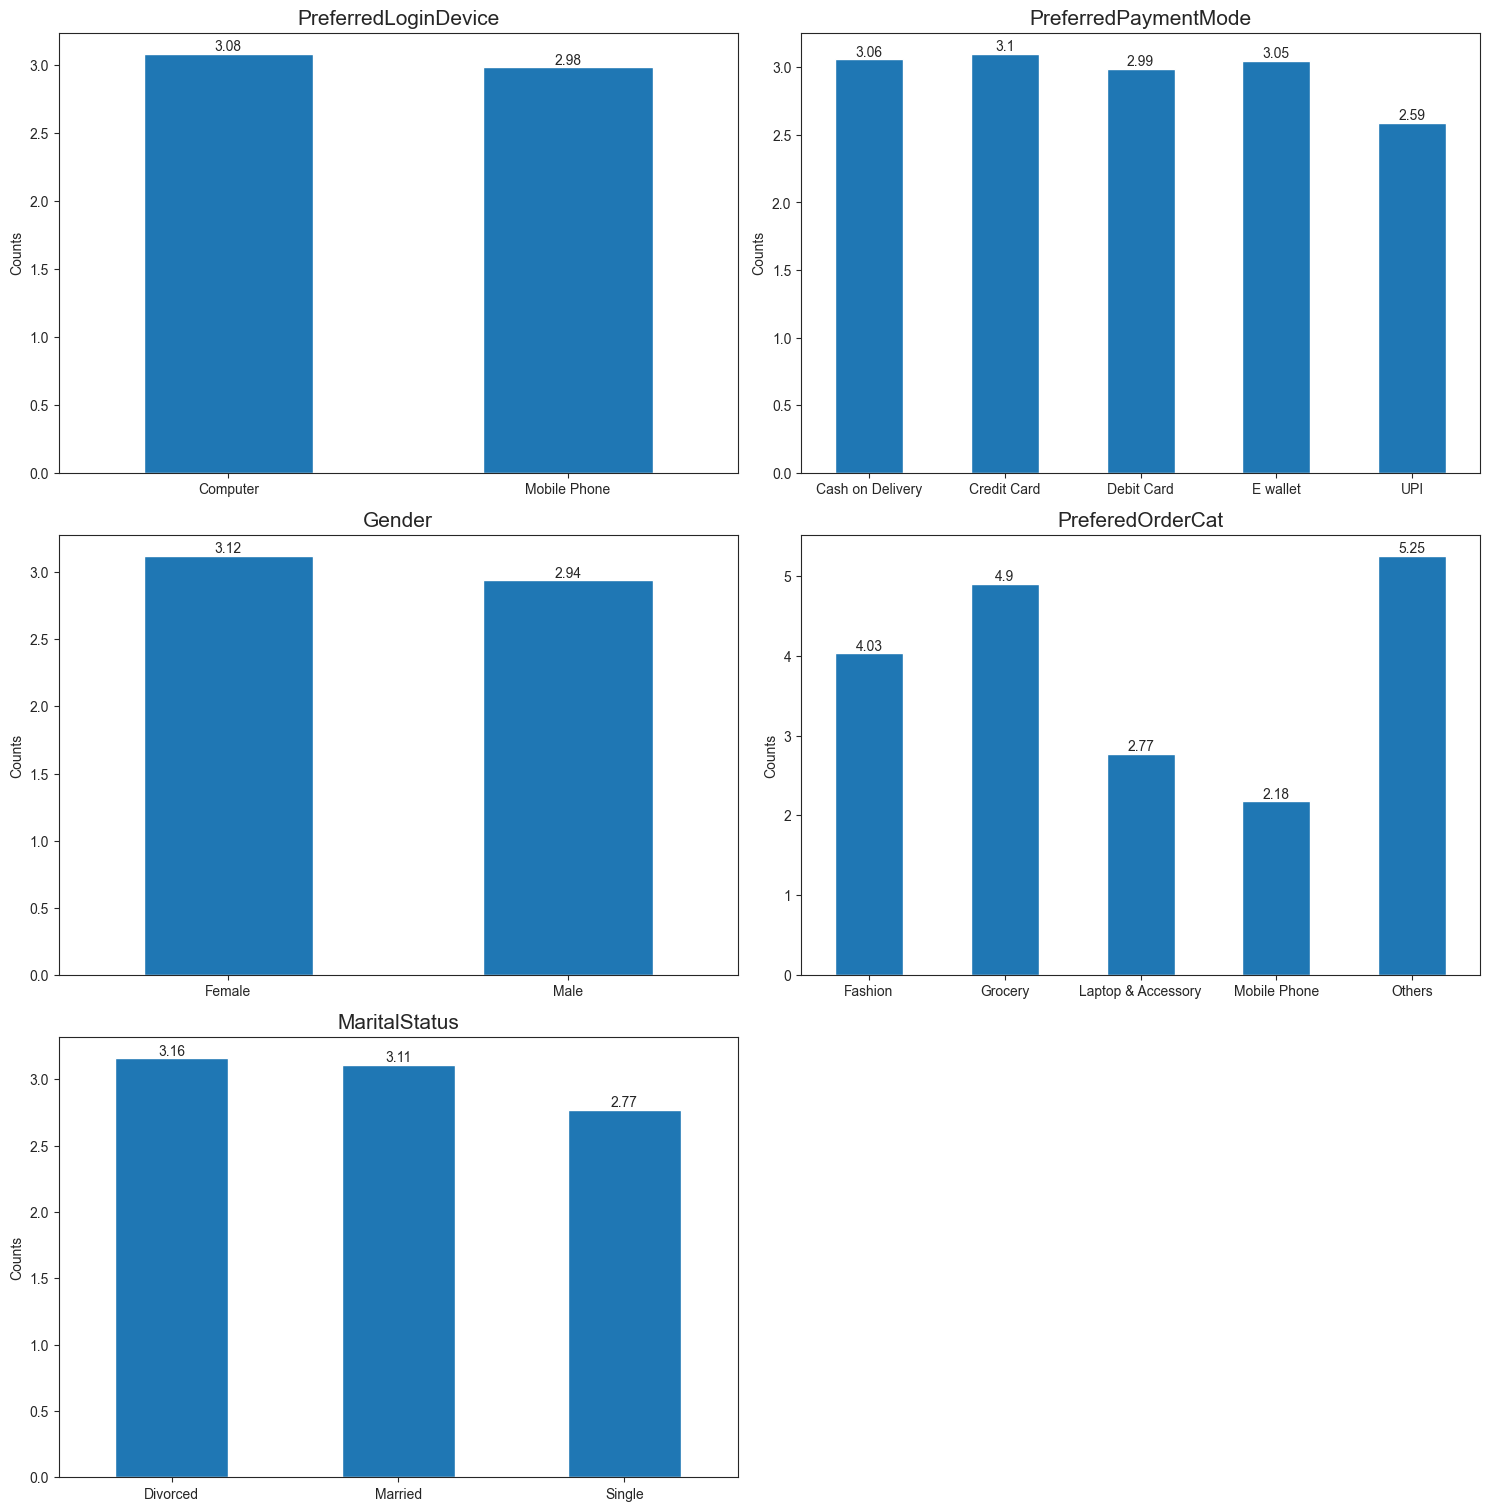

In [50]:
plt.figure(figsize = (15, 20))
def count_plot(column, row_serial, column_serial, fig_serial):
    plt.subplot(row_serial, column_serial, fig_serial)
    ax = round(df.groupby(column)["OrderCount"].mean(), 2).plot(kind = 'bar')
    ax.bar_label(ax.containers[0], size = 10)
    plt.title(column, size = 15)
    plt.xlabel(None)
    plt.ylabel('Counts', size = 10)
    plt.xticks(size = 10, rotation = 0)
    plt.yticks(size = 10, rotation = 0)
    plt.tight_layout()

column = cat_columns
row_serial = [4, 4, 4, 4, 4, 4, 4, 4]
column_serial = [2, 2, 2, 2, 2, 2, 2, 2]
fig_serial = [1, 2, 3, 4, 5, 6, 7, 8]

for i, j, k, p in zip(column, row_serial, column_serial, fig_serial):
    count_plot(i, j, k, p)

__Observations:__

There's no significant difference in sataisfaction score for different categorical features. 
Yet, on average : 
- Mean order count of females are slightly more than men. 
- Divorced customers are slightly more satisfied than married and single customers. 

## 3. with respect to 'SatisfactionScore' feature
### Mean Satisfaction Score of different Categorical Features 

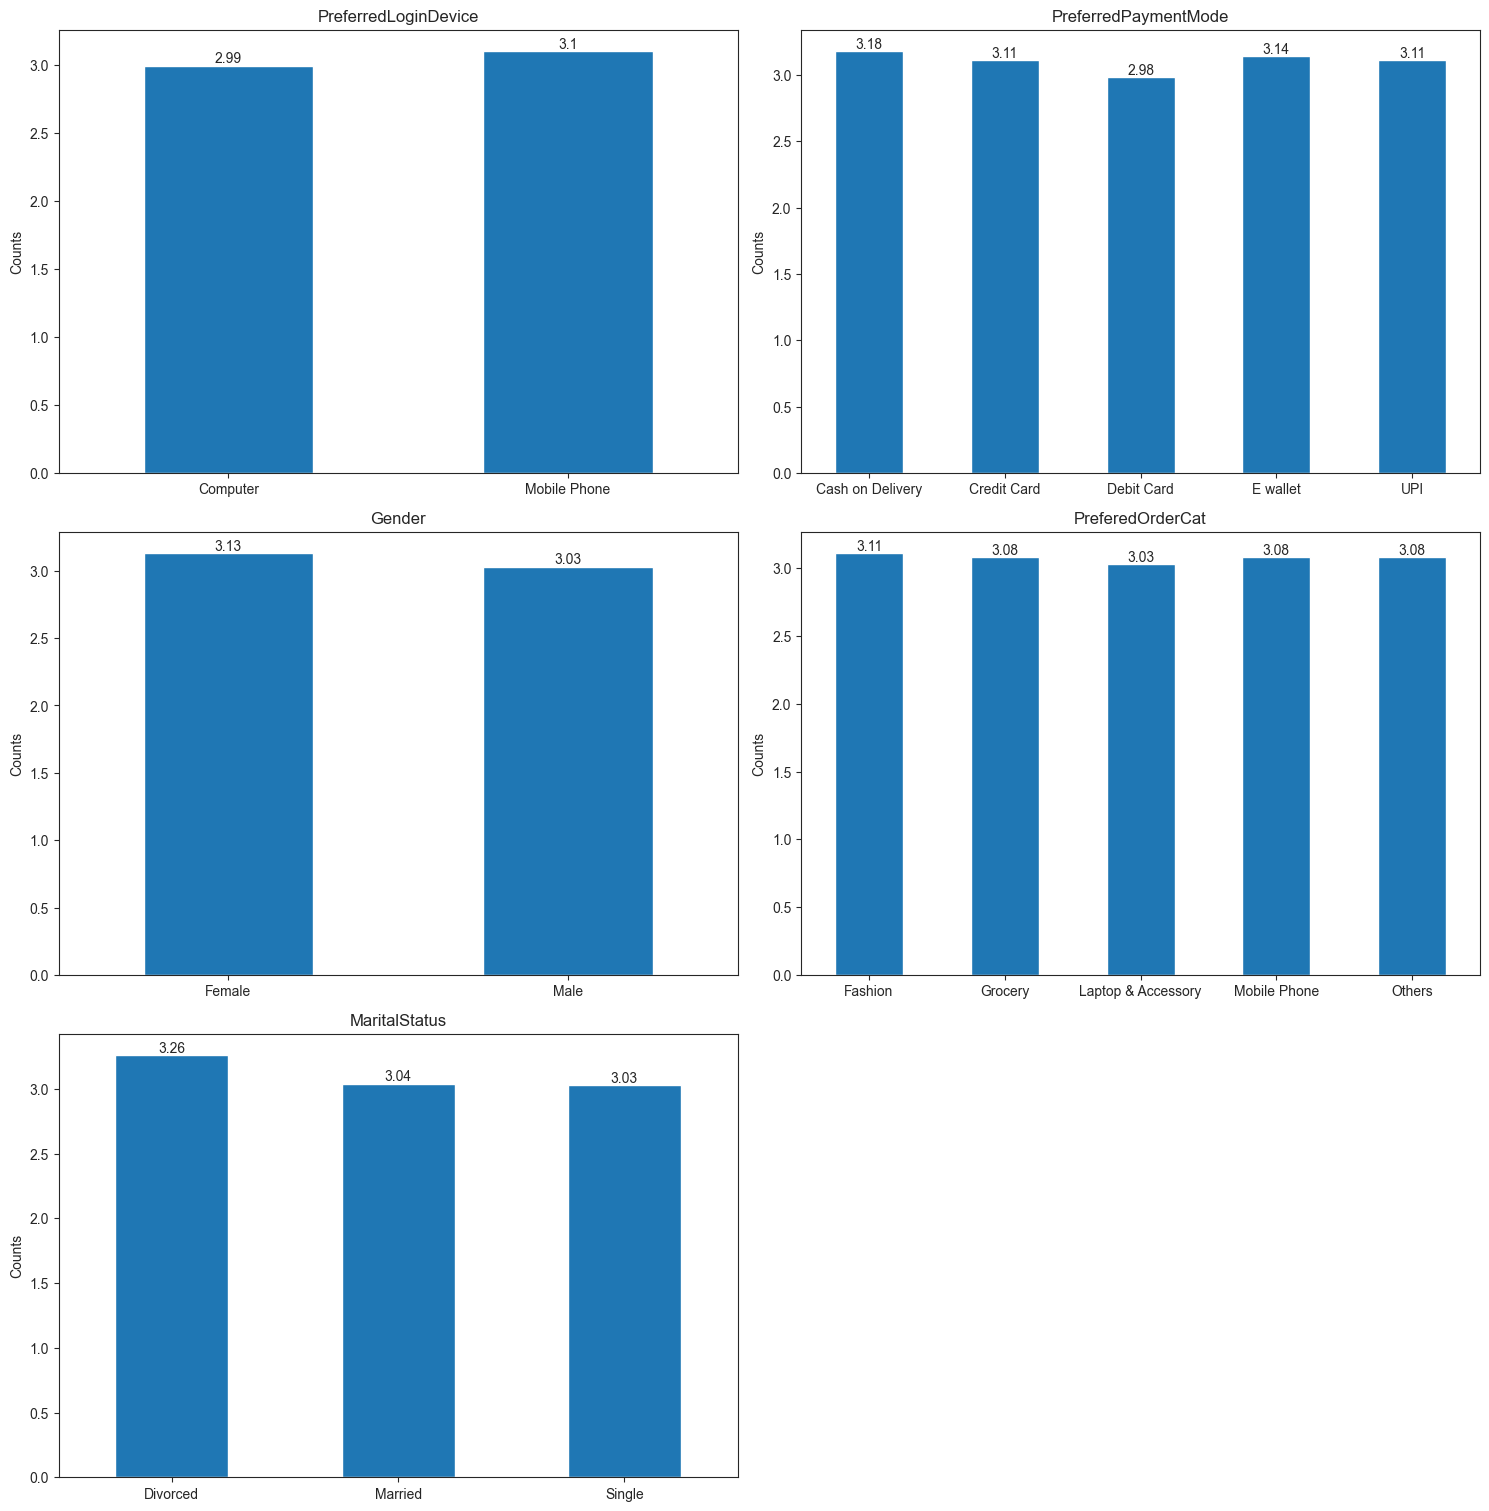

In [51]:
plt.figure(figsize = (15, 20))
def count_plot(column, row_serial, column_serial, fig_serial):
    plt.subplot(row_serial, column_serial, fig_serial)
    ax = round(df.groupby(column)["SatisfactionScore"].mean(), 2).plot(kind = 'bar')
    ax.bar_label(ax.containers[0], size = 10)
    plt.title(column, size = 12)
    plt.xlabel(None)
    plt.ylabel('Counts', size = 10)
    plt.xticks(size = 10, rotation = 0)
    plt.yticks(size = 10, rotation = 0)
    plt.tight_layout()

column = cat_columns
row_serial = [4, 4, 4, 4, 4, 4, 4, 4]
column_serial = [2, 2, 2, 2, 2, 2, 2, 2]
fig_serial = [1, 2, 3, 4, 5, 6, 7, 8]

for i, j, k, p in zip(column, row_serial, column_serial, fig_serial):
    count_plot(i, j, k, p)

__Observations:__

There's no significant difference in sataisfaction score for different categorical features. 
Yet, on average : 
- Females are slightly more satisfied than males.
- Divorced customers are slightly more satisfied than married and single customers. 

### Plotting SatisfactionScore against HourSpendOnApp

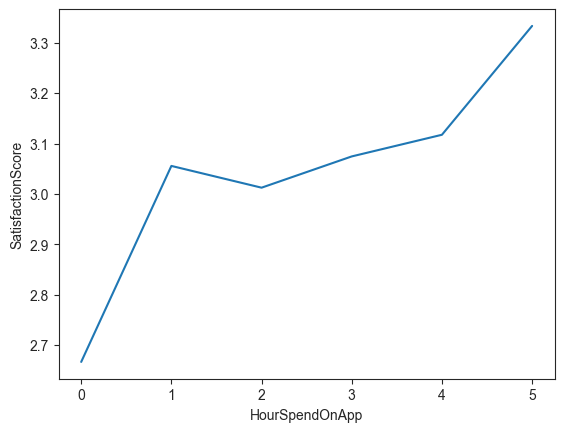

In [52]:
sns.lineplot(data = df, x = 'HourSpendOnApp', y = 'SatisfactionScore', errorbar = None)
plt.show();

Satisfaction Score increases when HoursSpendOnApp is less than 1 & greater than 2.

## 4. with respect to 'CityTier' feature

### Value Counts of different City Tier

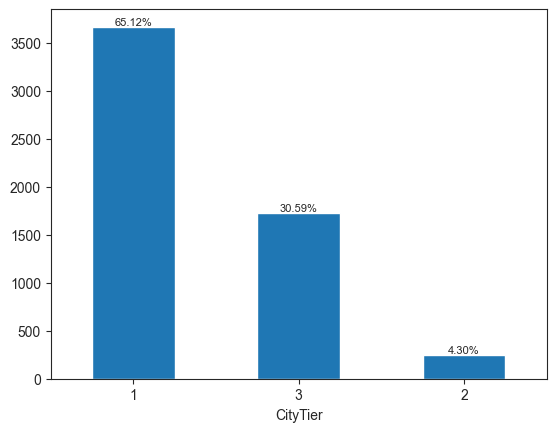

In [53]:
ax = df['CityTier'].value_counts().plot(kind = 'bar')
ax.bar_label(ax.containers[0], fmt = lambda x : f'{(x/total)*100:.2f}%', size = 8)
plt.xticks(rotation = 0);

__Observations:__

- As expected, most of the customers (65%) are from City Tier 1.
- 30% of the customers are from City Tier 2.
- About 4% of the customers are from City Tier 3. 

### Values of Categorical Features of different City Tiers

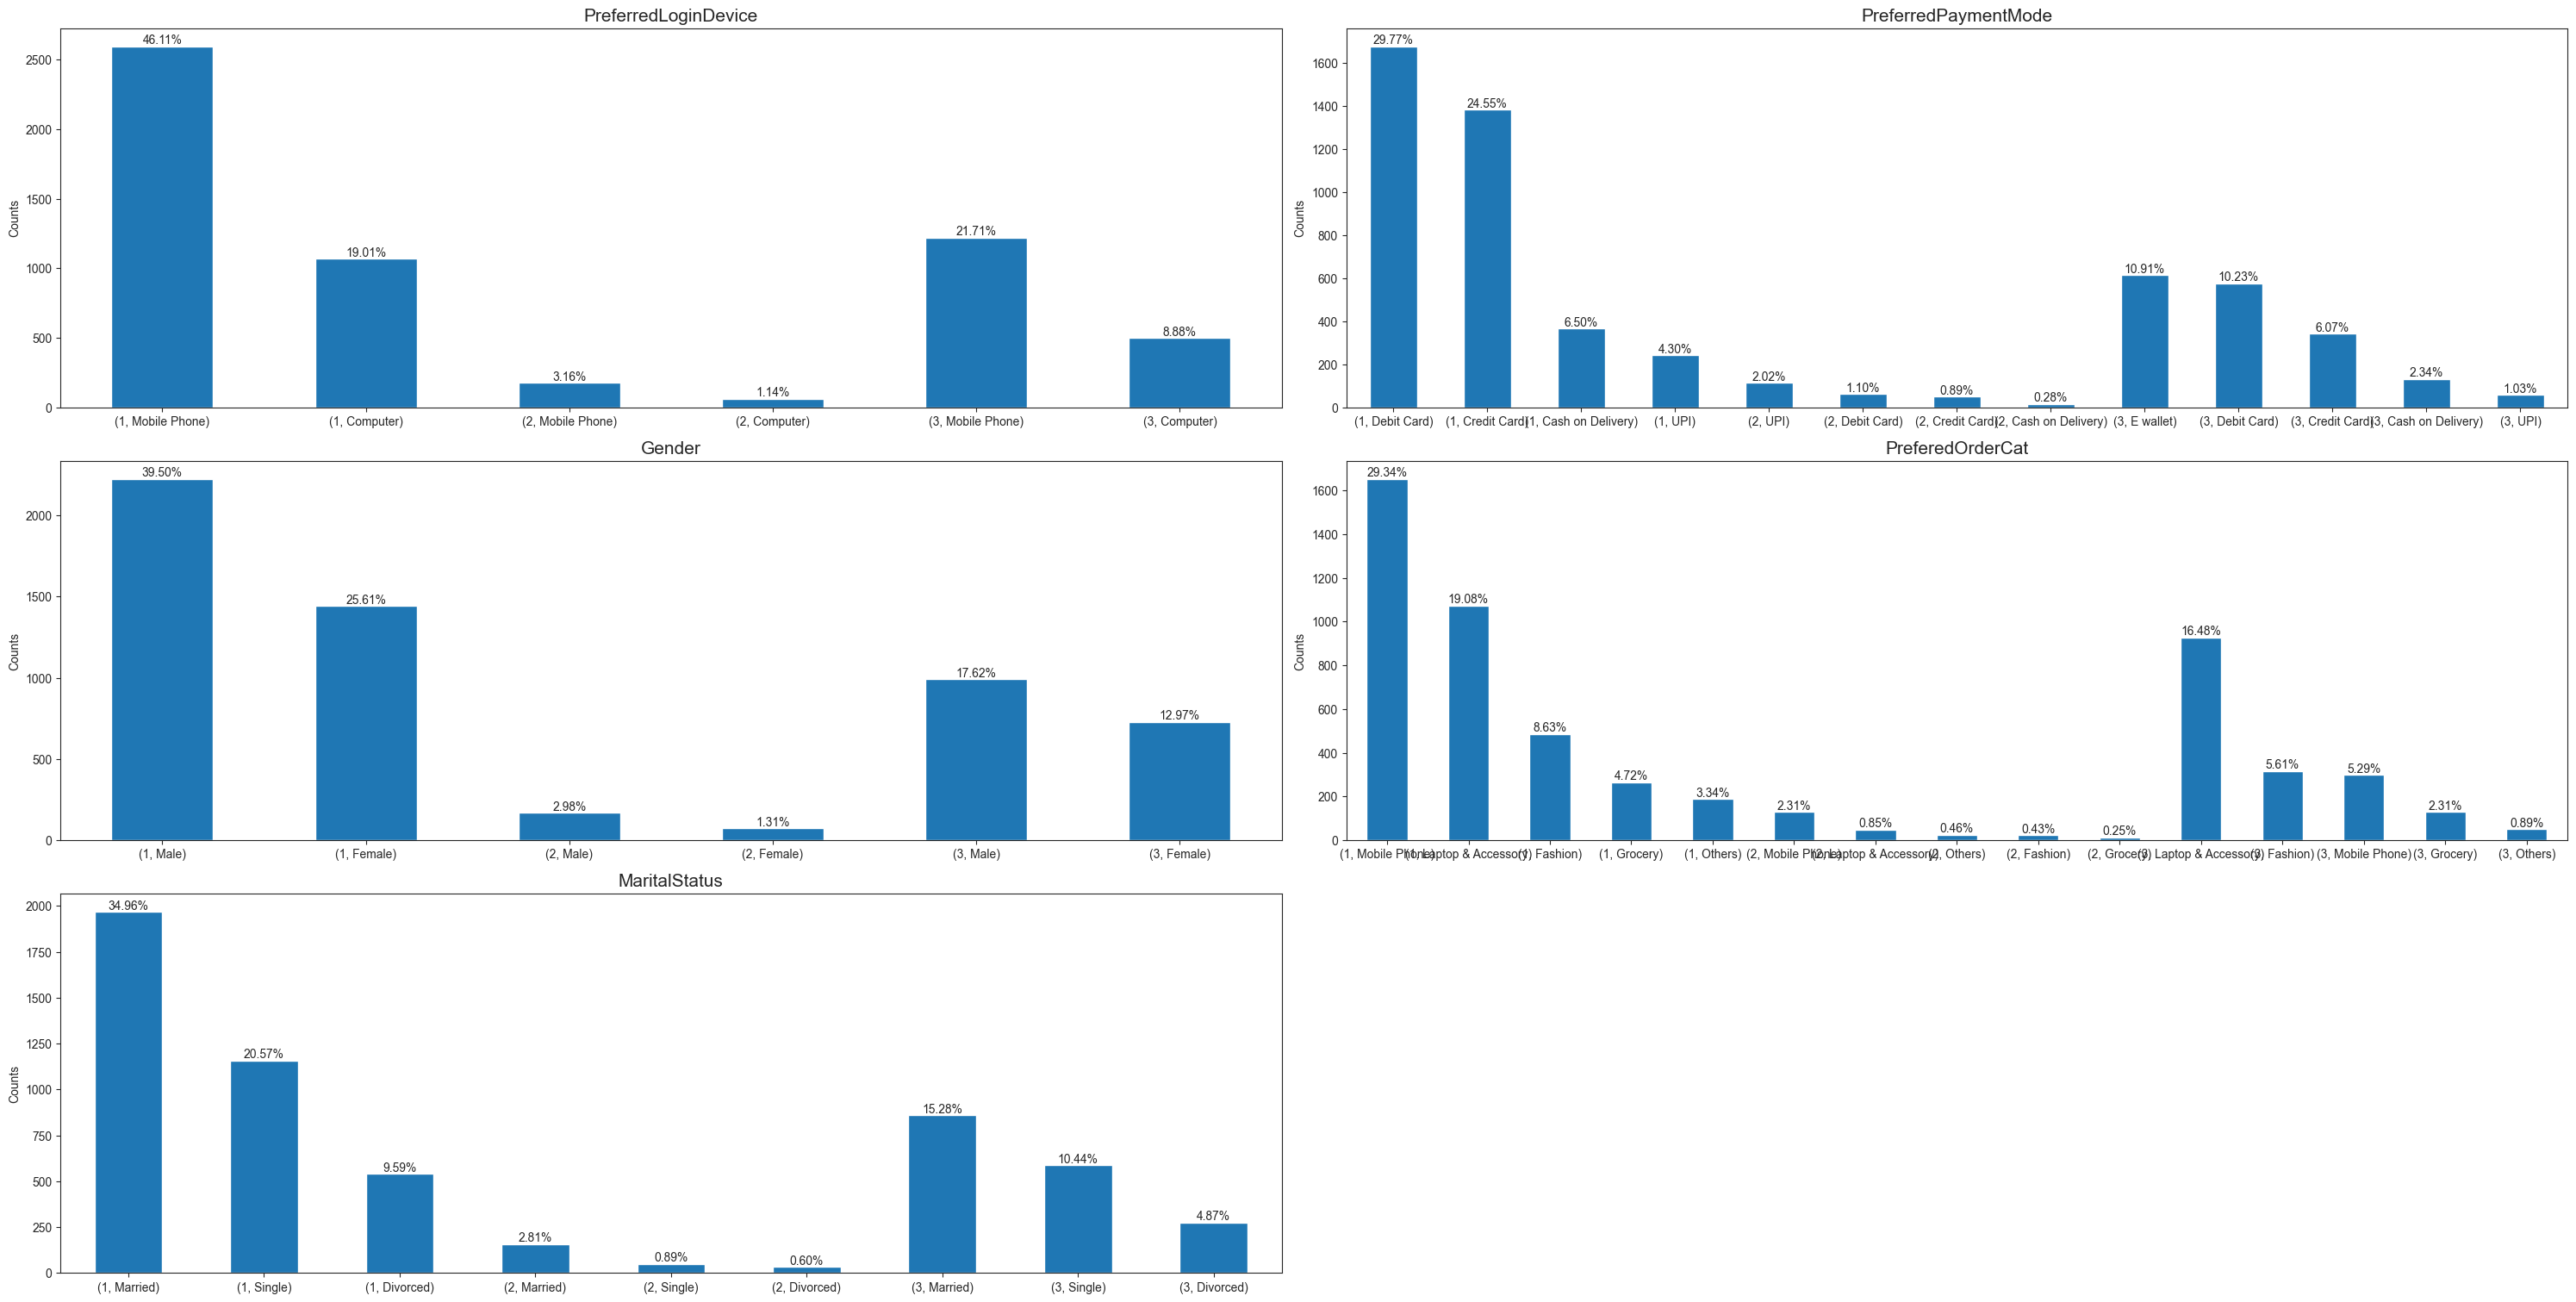

In [54]:
plt.figure(figsize = (30, 20))
def count_plot(column, row_serial, column_serial, fig_serial):
    plt.subplot(row_serial, column_serial, fig_serial)
    ax = df.groupby("CityTier")[column].value_counts().plot(kind = 'bar')
    total = df[column].count()
    ax.bar_label(ax.containers[0], fmt = lambda x : f'{(x/total)*100:.2f}%', size = 10)
    plt.title(column, size = 15)
    plt.xlabel(None)
    plt.ylabel('Counts', size = 10)
    plt.xticks(size = 10, rotation = 0)
    plt.yticks(size = 10, rotation = 0)
    plt.tight_layout()

column = cat_columns
row_serial = [4, 4, 4, 4, 4, 4, 4, 4]
column_serial = [2, 2, 2, 2, 2, 2, 2, 2]
fig_serial = [1, 2, 3, 4, 5, 6, 7, 8]

for i, j, k, p in zip(column, row_serial, column_serial, fig_serial):
    count_plot(i, j, k, p)

### Values of Numerical Features of different City Tiers

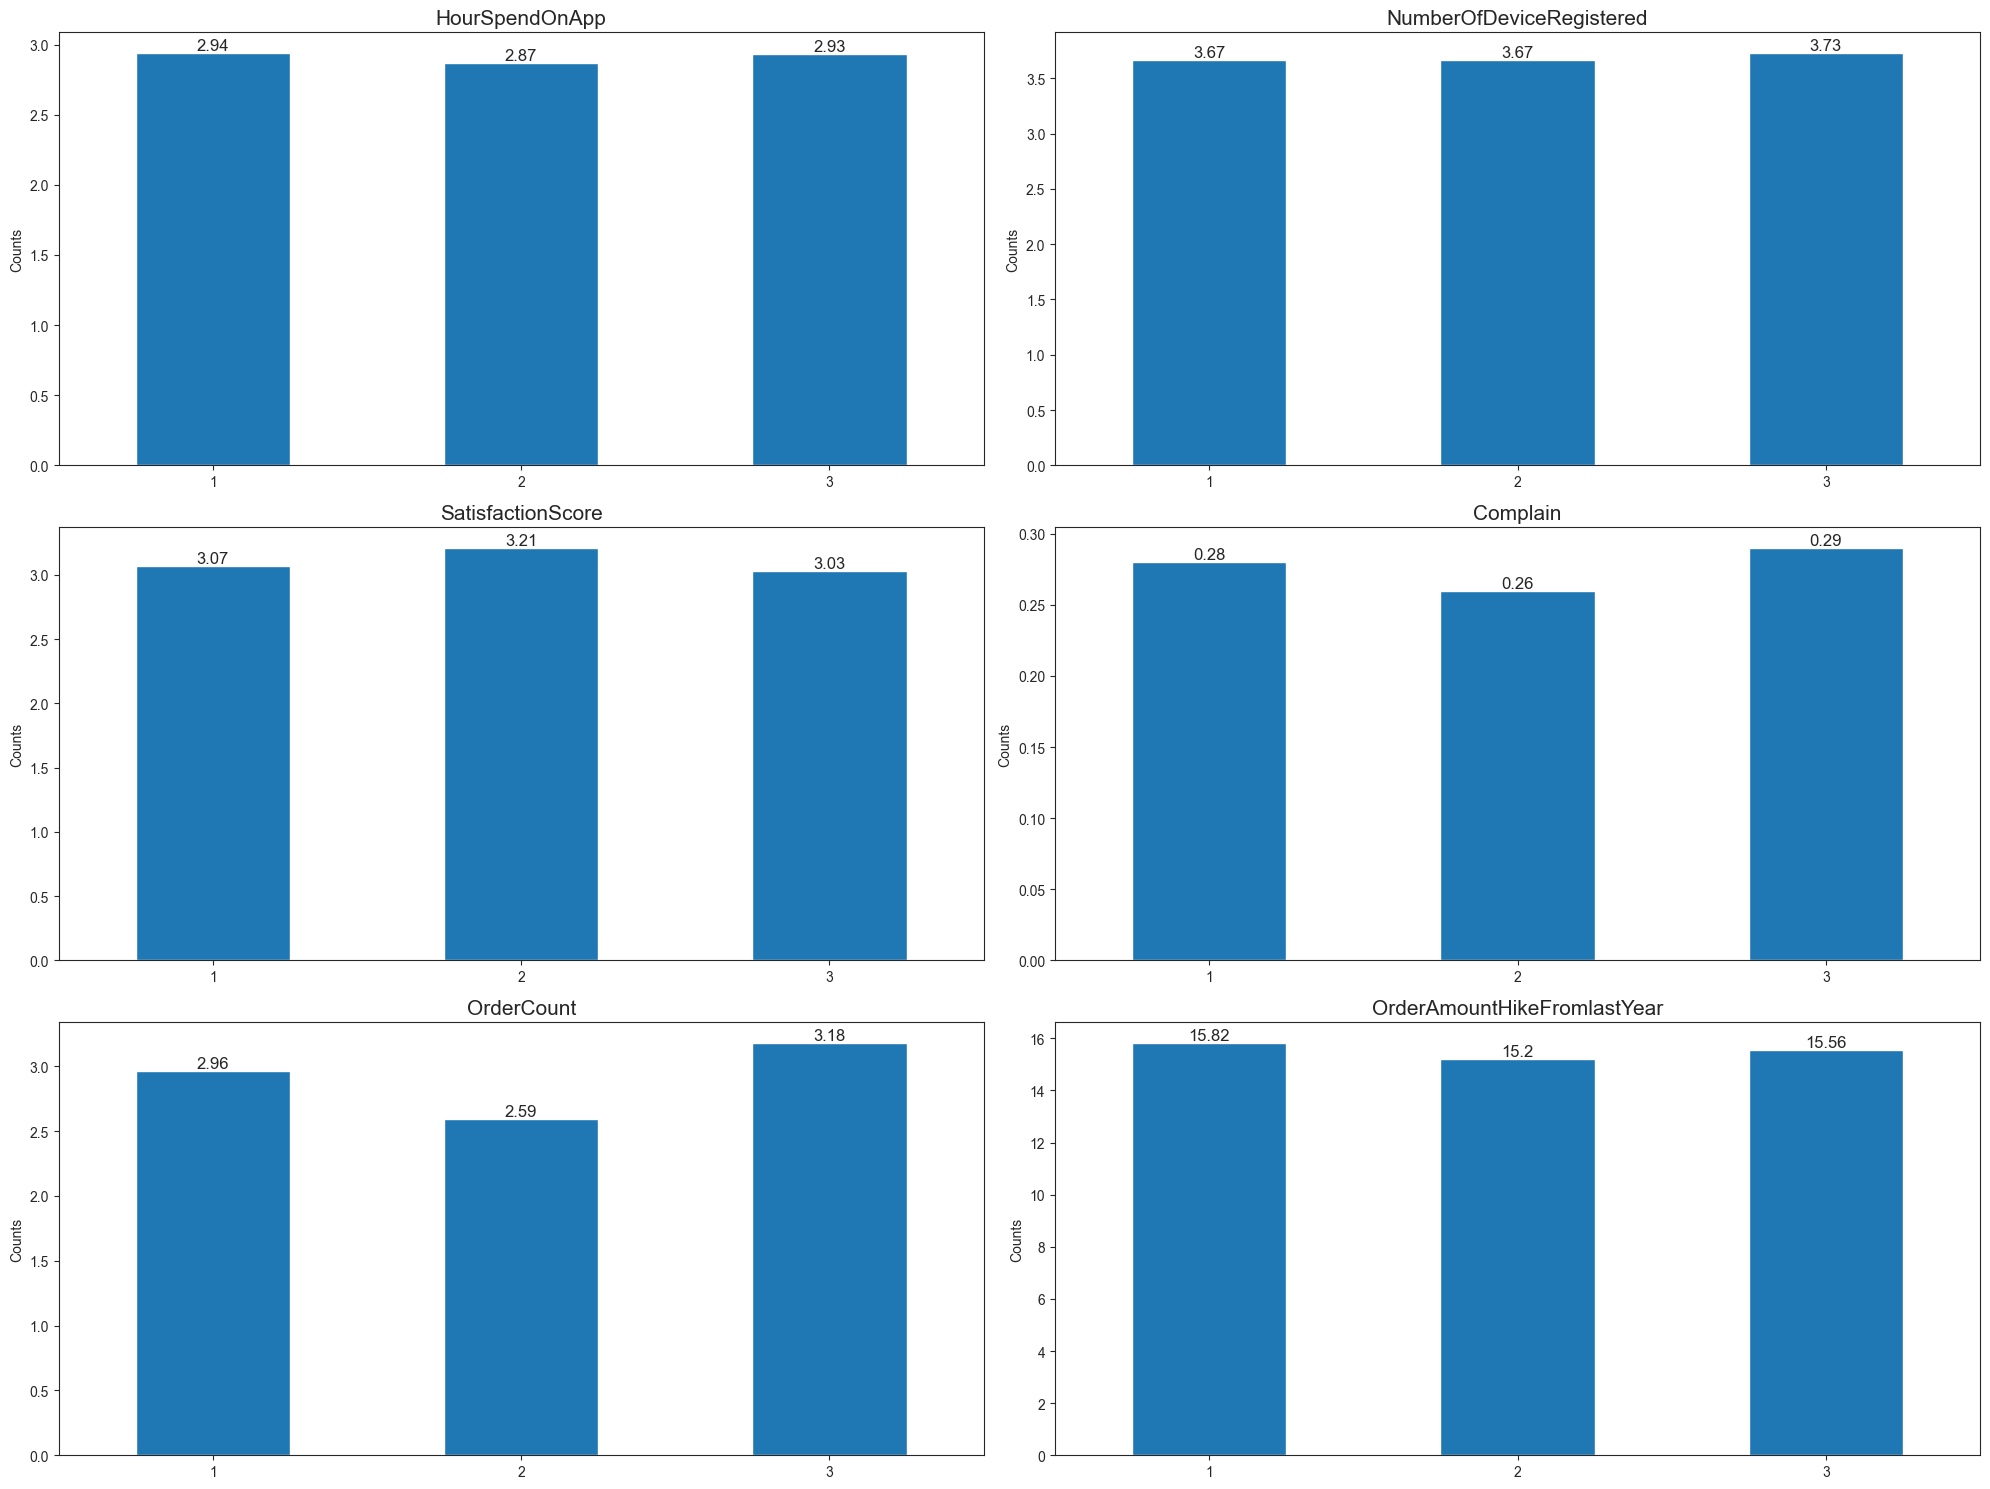

In [55]:
plt.figure(figsize = (20, 15))
def count_plot(column, row_serial, column_serial, fig_serial):
    plt.subplot(row_serial, column_serial, fig_serial)
    ax = round(df.groupby("CityTier")[column].mean(), 2).plot(kind = 'bar')
    ax.bar_label(ax.containers[0], size = 12)
    plt.title(column, size = 15)
    plt.xlabel(None)
    plt.ylabel('Counts', size = 10)
    plt.xticks(size = 10, rotation = 0)
    plt.yticks(size = 10, rotation = 0)
    plt.tight_layout()

column = ['HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'Complain', 'OrderCount', 'OrderAmountHikeFromlastYear']
row_serial = [3, 3, 3, 3, 3, 3]
column_serial = [2, 2, 2, 2, 2, 2]
fig_serial = [1, 2, 3, 4, 5, 6]

for i, j, k, p in zip(column, row_serial, column_serial, fig_serial):
    count_plot(i, j, k, p)

__Observations:__

Avg. order count from City Tier 3 is maximum. There's no significant difference in rest of the categorical values of different City Tiers. 

## 4. with respect to 'Complain' feature

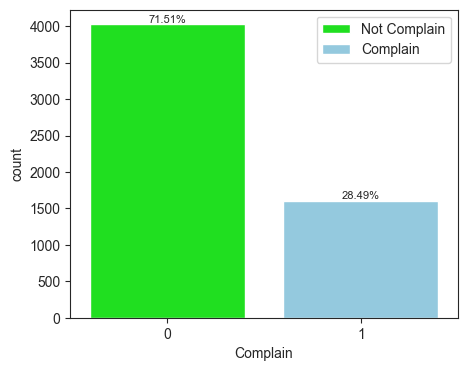

In [56]:
plt.figure(figsize = (5, 4))
ax = sns.countplot(data = df, x = 'Complain', ec = 'white', hue = 'Complain', palette = ['lime', 'skyblue'])
ax.legend(labels = ['Not Complain', 'Complain'])
total = df['Complain'].count()
ax.bar_label(ax.containers[0], fmt = lambda x : f'{(x/total)*100:.2f}%', size = 8)
ax.bar_label(ax.containers[1], fmt = lambda x : f'{(x/total)*100:.2f}%', size = 8);

In [57]:
df.groupby(['Complain', 'SatisfactionScore', 'Churn'])[['Churn']].count()

Churn
Complain SatisfactionScore Churn       
0        1                 0        736
                           1         56
         2                 0        384
                           1         32
         3                 0       1098
                           1        128
         4                 0        726
                           1         80
         5                 0        642
                           1        144
1        1                 0        294
                           1         78
         2                 0        128
                           1         42
         3                 0        308
                           1        164
         4                 0        164
                           1        104
         5                 0        202
                           1        120

## 5. Pairplot among the fetatures 

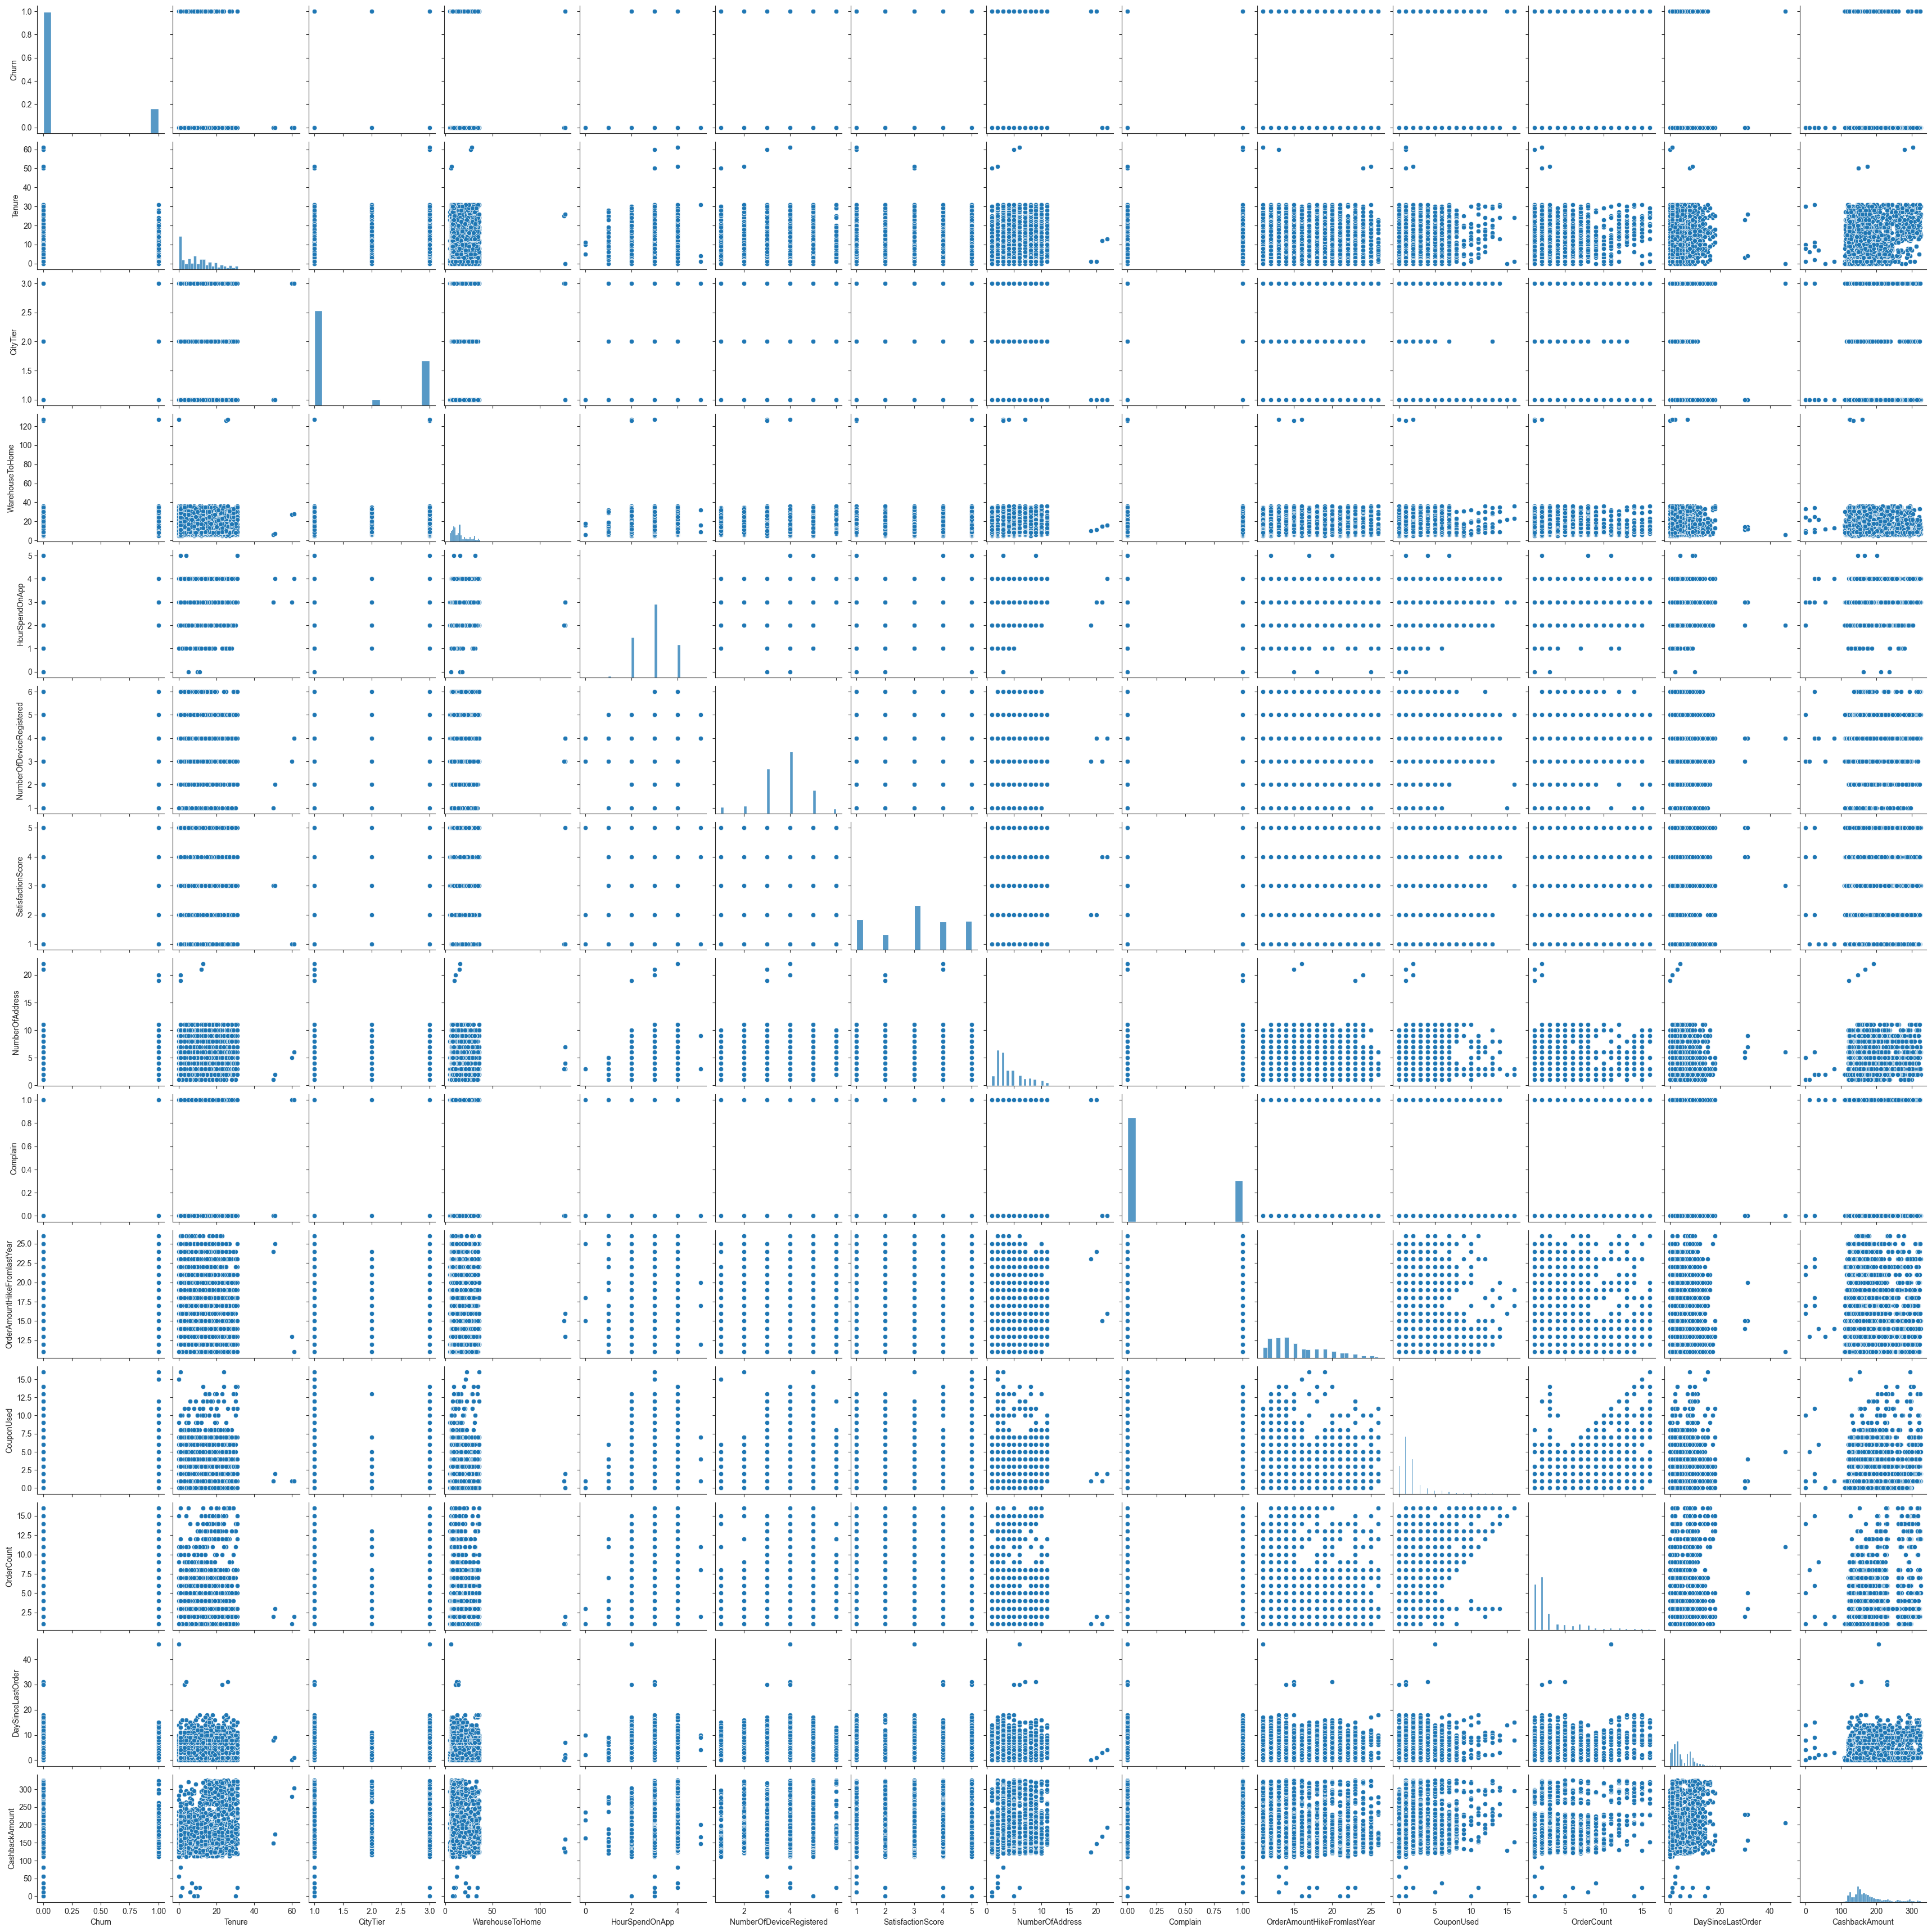

In [58]:
sns.pairplot(df[num_columns], diag_kind = 'hist');

Seems like, there's no regular correlation between any among the two features

<a id = "feature-encoding"></a>

# __Encoding of Features__
Encoding is necessary in order to transform the non-numeric data into numerical format, so that data become compatible with machine learning algorithms.

In [59]:
cat_columns

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

All of our categorical features are Nominal type. So, we will encode these features by __One Hot Encoder__.

## One Hot Encoding of Nominal Features

In [60]:
# importing Ordinal Ecoder
from sklearn.preprocessing import OrdinalEncoder

# creating an object of Ordinal Encoder
ordinal_encoder = OrdinalEncoder()
ordinal_data = cat_columns

for i in ordinal_data:
    df.loc[:, i] = ordinal_encoder.fit_transform(df[[i]])

In [61]:
df.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [62]:
df.sample(3)

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
3873      0    10.0                  1.0         1             10.0   
954       0    12.0                  1.0         1             12.0   
5319      0    13.0                  0.0         1             11.0   

     PreferredPaymentMode Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
3873                  2.0    1.0             4.0                         2   
954                   2.0    0.0             2.0                         3   
5319                  1.0    0.0             3.0                         4   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
3873              2.0                  5           1.0                8   
954               0.0                  4           2.0                5   
5319              2.0                  3           2.0                2   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
3873         0                         21.0         2.0         2.0   
954          0                         18.0         0.0         2.0   
5319         0                         14.0         4.0         4.0   

      DaySinceLastOrder  CashbackAmount  
3873                5.0          193.42  
954                 2.0          183.76  
5319                9.0          175.42

So, all of our features have successfully encoded.

# Visualizing the Correlation among Features

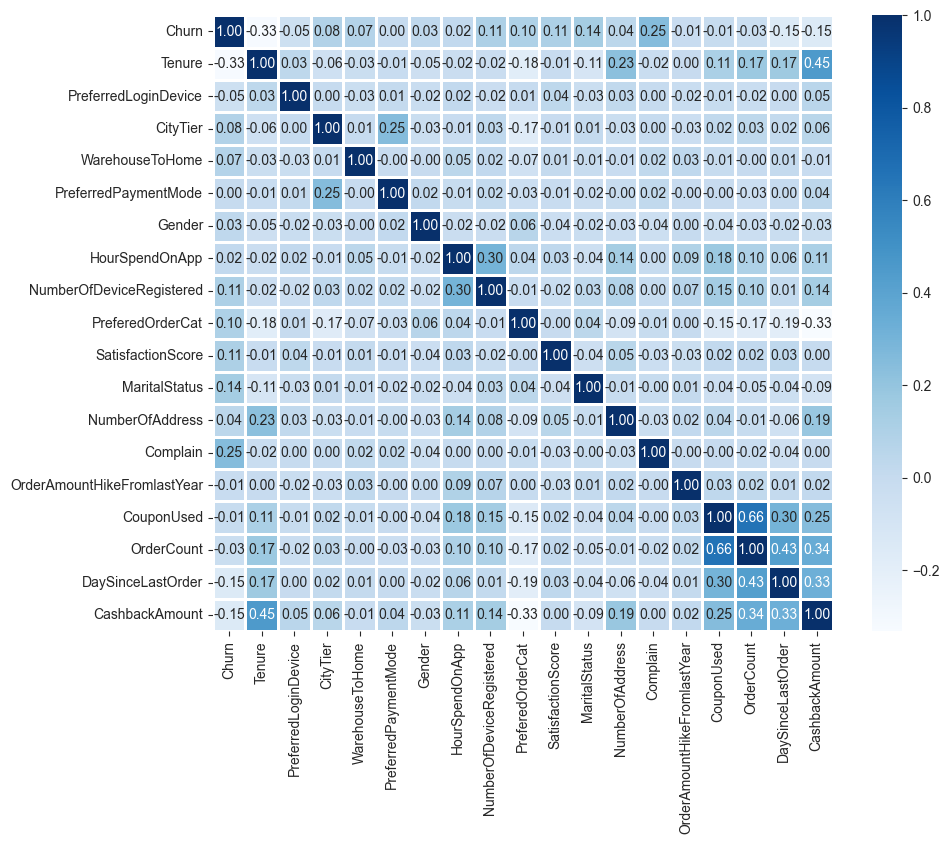

In [63]:
# Creating correlation matrix
corr_mat = df.corr()

#plotting heatmap of correlation matrix
plt.figure(figsize = (10, 8))
sns.heatmap(corr_mat, annot = True, cmap = 'Blues', fmt = '.2f', linewidth = 1, linecolor = 'white');

__Observations:__

1. _OrderCount_ & _CouponUsed_ is positively correlated with a coefficient of 0.65. 
1. _CashbackAmount_ & _Tenure_ is slightly positively correlated with a coefficient of 0.46. 
1. _OrderCOunt_ & _DaySinceLastOrder_ is slightly positively correlated with a coefficient of 0.44.
1. There is no significant correlation between _Churn_ & _Complain_ (0.25).

<a id = "splitting-dataset"></a>

# __Splitting the Dataset into train, validation & test set__
- Train set will be used for training the models.
- Validation set will be used for cross validation of the models. 
- Test set will be untouched and will be used for final assessment of the final classification model. 

## Separating Predictors(X) & Target(Y) of the dataframe

In [64]:
X = df.drop('Churn', axis = 1)     # Predictors 
Y = df['Churn']    # Target 

## Splitting the dataset into test datset and train & validation dataset

In [65]:
x, x_test, y, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 18)

x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size = 0.17, random_state = 18) 

### Shape of the Final datasets

In [66]:
print('Shape of train predictors = ', x_train.shape)
print('Shape of train target = ', y_train.shape, '\n')

print('Shape of validation predictors = ', x_validate.shape)
print('Shape of validation target = ', y_validate.shape, '\n')

print('Shape of test predictors = ', x_test.shape)
print('Shape of test target = ', y_test.shape)

Shape of train predictors =  (3971, 18)
Shape of train target =  (3971,) 

Shape of validation predictors =  (814, 18)
Shape of validation target =  (814,) 

Shape of test predictors =  (845, 18)
Shape of test target =  (845,)


1. __70%__ of total data will be used for __training__ the models;
1. __14%__ of total data will be used for __validating__ the models; 
1. Rest __15%__ of total total data will be untouched for __testing__ purpose.

Training & Validation datasets will be concatenated before the final training step.

<a id = "feature-scaling"></a>

# __Feature Scaling__

Feature scaling is the process of standardizing the values of the features of a dataset to a common scale; i.e., in a fixed range. Feature Scaling is done to improve the Models' performance. There are various methods of scaling the feature data. As our feature data have outliers, we'll perform __Robust Scaling__.

In [67]:
# importing RobustScaler 
from sklearn.preprocessing import RobustScaler

# creating a Robust Scaler Object
scaler = RobustScaler()

x_train_scaled = scaler.fit_transform(x_train)  # fit & transform the scaler to train data
x_validate_scaled = scaler.transform(x_validate)  # transform the scaler to validation data
x_test_scaled = scaler.transform(x_test)  # transform the scaler to test data

In [68]:
# Step 1 : Scaled predictors' data are of array type. These arrays will be converted into dataframes. 
# Step 2 : Original feature names will be recoverd.  
# Step 3 : dataframes will be renamed. 

x_train_scaled = pd.DataFrame(x_train_scaled)
x_train_scaled.columns = x_train.columns   
X_train = x_train_scaled   # Final Train Predictors

x_validate_scaled = pd.DataFrame(x_validate_scaled)
x_validate_scaled.columns = x_validate.columns   
X_validate = x_validate_scaled   # Final Validation Predictors

x_test_scaled = pd.DataFrame(x_test_scaled)
x_test_scaled.columns = x_test.columns  
X_test = x_test_scaled   # Final Test Predictors (will be untouched until the completion of building and selecting the model)

## Comparision between Unscaled data (x_train) and Scaled data (X_train)

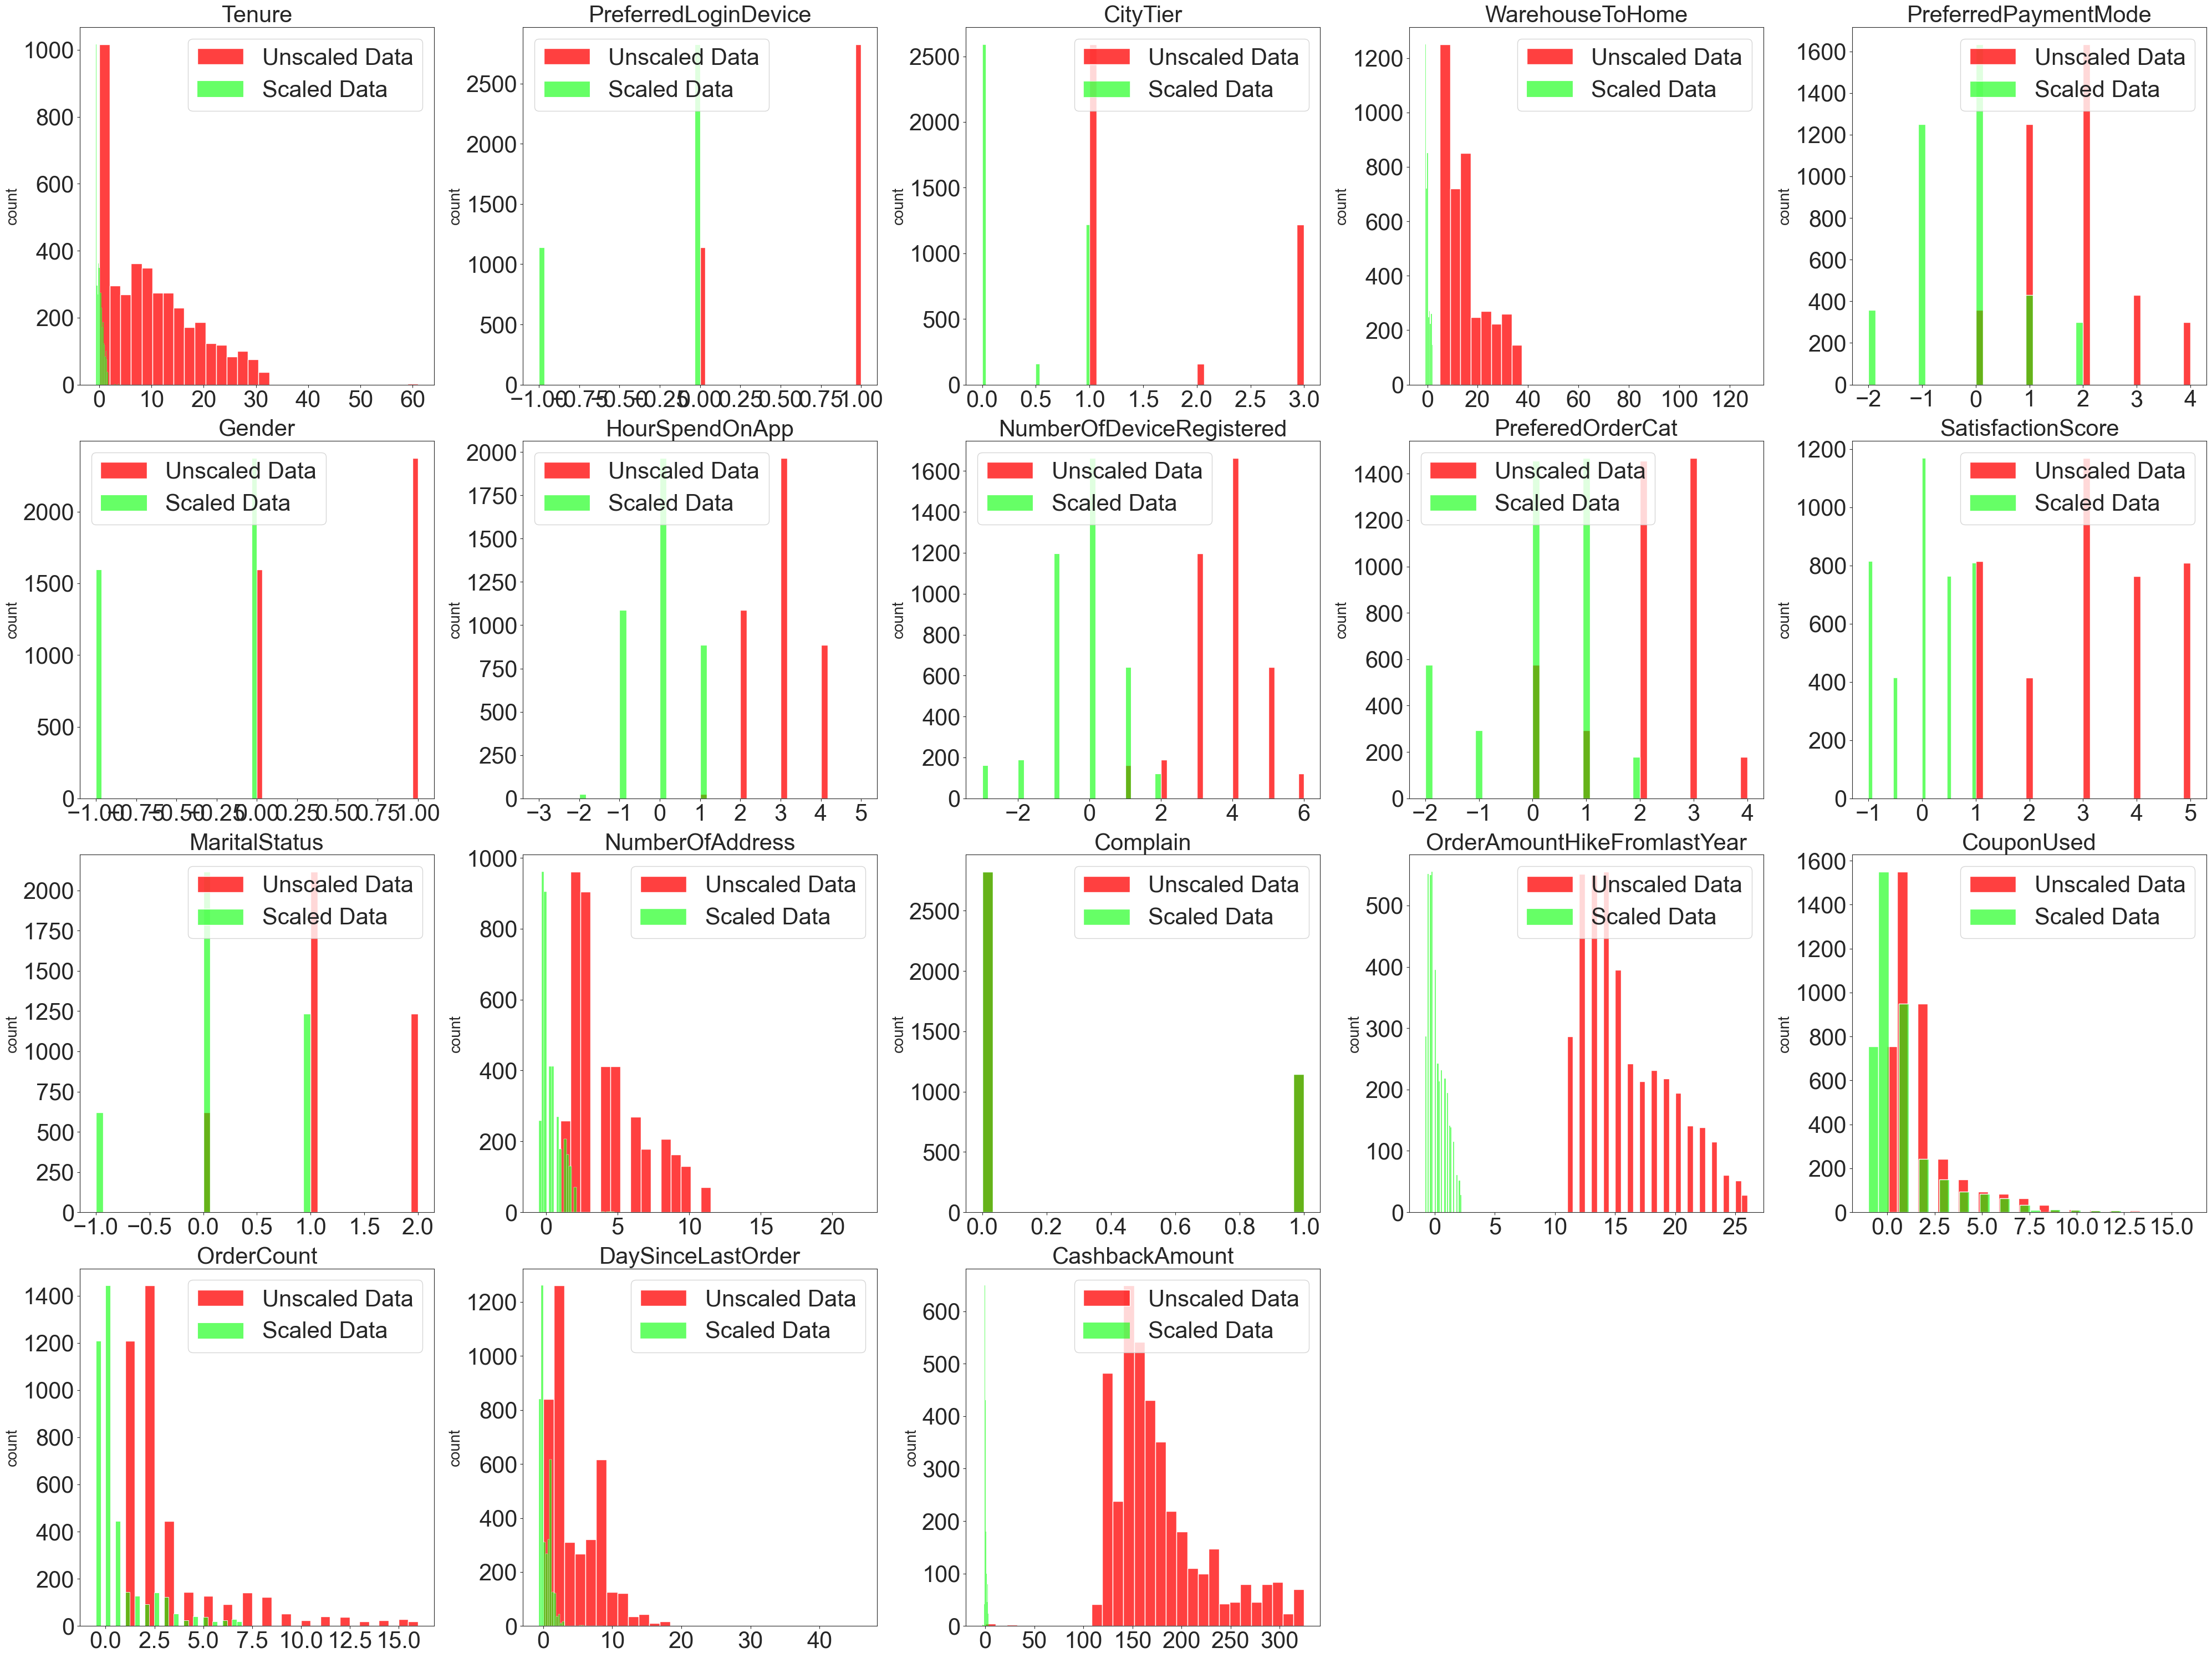

In [69]:
plt.figure(figsize = (40, 30))
def bar_plot(feature, row_serial, column_serial, fig_serial):
    plt.subplot(row_serial, column_serial, fig_serial)
    sns.histplot(x_train[feature], bins = 30, color = 'r')
    sns.histplot(X_train[feature], bins = 30, color = 'lime', alpha = 0.6)
    plt.title(feature, size = 30)
    plt.xlabel(None)
    plt.ylabel('count', size = 20)
    plt.legend(labels = ['Unscaled Data', 'Scaled Data'], fontsize = 30, loc = 'best')
    plt.xticks(size = 30)
    plt.yticks(size = 30)
    plt.tight_layout()

feature = X_train.columns
column_serial = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
row_serial = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
fig_serial = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]  

for i, j, k, p in zip(feature, row_serial, column_serial, fig_serial):
    bar_plot(i, j, k, p)

<a id = "building-models"></a>

# __Building Classification Models__

We'll build 9 different ML Models based on different Classification Algorithms. After assessing the performances of all these models, we'll select our best model.

In [70]:
# Creating Model objects with default hyperparameters
models = [('Logistic Regression', LogisticRegression()),
          ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()),
          ('Random Forest Classifier', RandomForestClassifier()),
          ('Gradient Boosting Classifier', GradientBoostingClassifier()),
          ('Decision Tree Classifier', DecisionTreeClassifier()),
          ('K-Nearest Neighbours Classifier', KNeighborsClassifier()),
          ('XGB Classifier', XGBClassifier()),
          ('Gaussian Naive Bayes', GaussianNB()),
          ('Support Vector Machine Classifier', SVC(gamma='auto'))]

# Fitting the train data into the model objects & classifying target feature (Churn)
for model in models:
    model[1].fit(X_train, y_train)

# __Assessing the performance of the models by train data__

In [71]:
for model in models:
    y_train_predict = model[1].predict(X_train)
    print(model[0], '\n---------------------')
    print('Accuracy Score =', round(accuracy_score(y_train, y_train_predict), 2))
    print('Precision Score =', round(precision_score(y_train, y_train_predict), 2))
    print('f1 Score =', round(f1_score(y_train, y_train_predict), 2))
    print('Recall Score =', round(recall_score(y_train, y_train_predict), 2))
    print('ROC-AUC Score =', round(roc_auc_score(y_train, y_train_predict), 2), '\n\n')

Logistic Regression 
---------------------
Accuracy Score = 0.88
Precision Score = 0.73
f1 Score = 0.53
Recall Score = 0.42
ROC-AUC Score = 0.7 


Linear Discriminant Analysis 
---------------------
Accuracy Score = 0.88
Precision Score = 0.73
f1 Score = 0.52
Recall Score = 0.4
ROC-AUC Score = 0.69 


Random Forest Classifier 
---------------------
Accuracy Score = 1.0
Precision Score = 1.0
f1 Score = 1.0
Recall Score = 1.0
ROC-AUC Score = 1.0 


Gradient Boosting Classifier 
---------------------
Accuracy Score = 0.93
Precision Score = 0.87
f1 Score = 0.76
Recall Score = 0.67
ROC-AUC Score = 0.83 


Decision Tree Classifier 
---------------------
Accuracy Score = 1.0
Precision Score = 1.0
f1 Score = 1.0
Recall Score = 1.0
ROC-AUC Score = 1.0 


K-Nearest Neighbours Classifier 
---------------------
Accuracy Score = 0.93
Precision Score = 0.93
f1 Score = 0.76
Recall Score = 0.65
ROC-AUC Score = 0.82 


XGB Classifier 
---------------------
Accuracy Score = 1.0
Precision Score = 1.0
f1 

<a id = "cross-validation"></a>

# __Cross Validation of the Models by validation dataset__
Cross Validation is used to test the Models' ability to predict new data that was not used in estimating the models. 

Cross Validation can be used to checking whether a Model is Overfitted or not. Overfitting is an undesirable machine learning behavior that occurs when the machine learning model gives accurate predictions for training data but not for new data. It is common and perhaps normal for the model to have better performance on the training set than the test set. But, if the performance of the model on the training dataset is significantly better than the performance on the test dataset, then the model may have overfit the training dataset.

In [72]:
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

for name, model in models:
    folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 9)
    cv_scores = cross_validate(model, X_validate, y_validate, cv = folds, scoring = scoring)
    accuracy_score = cv_scores['test_accuracy']
    precision_score = cv_scores['test_precision']
    recall_score = cv_scores['test_recall']
    f1_score = cv_scores['test_f1']
    roc_auc_score = cv_scores['test_roc_auc']
#     log_loss_score = cv_scores['test_neg_log_loss']
    
    print('{}'.format(name), '\n','-'*25)
    print('Accuracy Score = ', round(np.mean(accuracy_score), 3))
    print('Precision Score = ', round(np.mean(precision_score), 3))
    print('Recall Score = ', round(np.mean(recall_score), 2))
    print('f1 Score = ', round(np.mean(f1_score), 2))
    print('ROC_AUC_Score = ', round(np.mean(roc_auc_score), 2), '\n\n')
#     print('logistic_loss = ', round(np.mean(log_loss_score), 2), '\n\n')

Logistic Regression 
 -------------------------
Accuracy Score =  0.88
Precision Score =  0.72
Recall Score =  0.48
f1 Score =  0.57
ROC_AUC_Score =  0.89 


Linear Discriminant Analysis 
 -------------------------
Accuracy Score =  0.877
Precision Score =  0.692
Recall Score =  0.49
f1 Score =  0.57
ROC_AUC_Score =  0.88 


Random Forest Classifier 
 -------------------------
Accuracy Score =  0.896
Precision Score =  0.818
Recall Score =  0.5
f1 Score =  0.61
ROC_AUC_Score =  0.92 


Gradient Boosting Classifier 
 -------------------------
Accuracy Score =  0.882
Precision Score =  0.708
Recall Score =  0.54
f1 Score =  0.61
ROC_AUC_Score =  0.9 


Decision Tree Classifier 
 -------------------------
Accuracy Score =  0.842
Precision Score =  0.53
Recall Score =  0.53
f1 Score =  0.53
ROC_AUC_Score =  0.72 


K-Nearest Neighbours Classifier 
 -------------------------
Accuracy Score =  0.839
Precision Score =  0.57
Recall Score =  0.18
f1 Score =  0.27
ROC_AUC_Score =  0.73 


XGB Cl

C:\Users\Jilan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Support Vector Machine Classifier 
 -------------------------
Accuracy Score =  0.859
Precision Score =  0.855
Recall Score =  0.18
f1 Score =  0.28
ROC_AUC_Score =  0.88 




### __Insights:__

1. Both the Cross Validation Scores & predicted scores of training data are almost same. So, It can be safely said that, __none of the models overfit the data__.

2. Based on the performance metrics, __Random Forest Classification Model__ is the best model for this particular study.  

<a id = "hyperparameter-tuning"></a>

# __Hyperparameter Tuning__
Hyperparameter Tuning is done to find out the optimum values of Hyperparameters of Models which will maximize the Models' Performance. There are different ways for fine-tuning hyperparameters. Here, we will apply __RandomizedSearchCV__ method. 

In [73]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [74]:
# Estimator
estimator = RandomForestClassifier()

# Creating the dictionaries of hyperparameters and their corresponding values 
params_RF = {'n_estimators' : [100, 500, 1000],
             'max_depth' : [None, 3, 5]}

# cv
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scoring = {"Accuracy" : 'accuracy', "Precision" : 'precision', "Recall" : 'recall', "F1" : "f1", "AUC" : "roc_auc"}

# multi-metric evaluation on cross_val_score 
rand_search_cv = RandomizedSearchCV(estimator = estimator,
                                    param_distributions = params_RF,
                                    cv = cv,
                                    scoring = scoring,
                                    refit = "Accuracy",
                                    n_jobs = -1)

rand_search_cv.fit(X_train, y_train)
print(f'best parameters of {estimator}\n', rand_search_cv.best_params_, '\n')
print(f'best result of {estimator} = ', round((rand_search_cv.best_score_), 3), '\n\n')

C:\Users\Jilan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


best parameters of RandomForestClassifier()
 {'n_estimators': 1000, 'max_depth': None} 

best result of RandomForestClassifier() =  0.954 




## __Final Model__

In [75]:
final_clf_model = RandomForestClassifier(n_estimators = 1000, max_depth = None)

## __Final Train Data__

In [76]:
# Concatanating Train & Validataion Dataset together

X_train_final = pd.concat([X_train, X_validate])
y_train_final = pd.concat([y_train, y_validate])

print('Shape of final train predictors = ', X_train_final.shape)
print('Shape of final train target = ', y_train_final.shape)

Shape of final train predictors =  (4785, 18)
Shape of final train target =  (4785,)


In [77]:
# Fitting the final train data into the final model 
final_clf_model.fit(X_train_final, y_train_final)

RandomForestClassifier(n_estimators=1000)

<a id = "feature-importance"></a>

# __Feature importance Checking__
Feature importance refers to the technique that calculates a score for all the input features for a given model. The scores represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable. Feature importance allows you to understand the relationship between the features and the target variable. It also helps you understand what features are irrelevant for the model. 

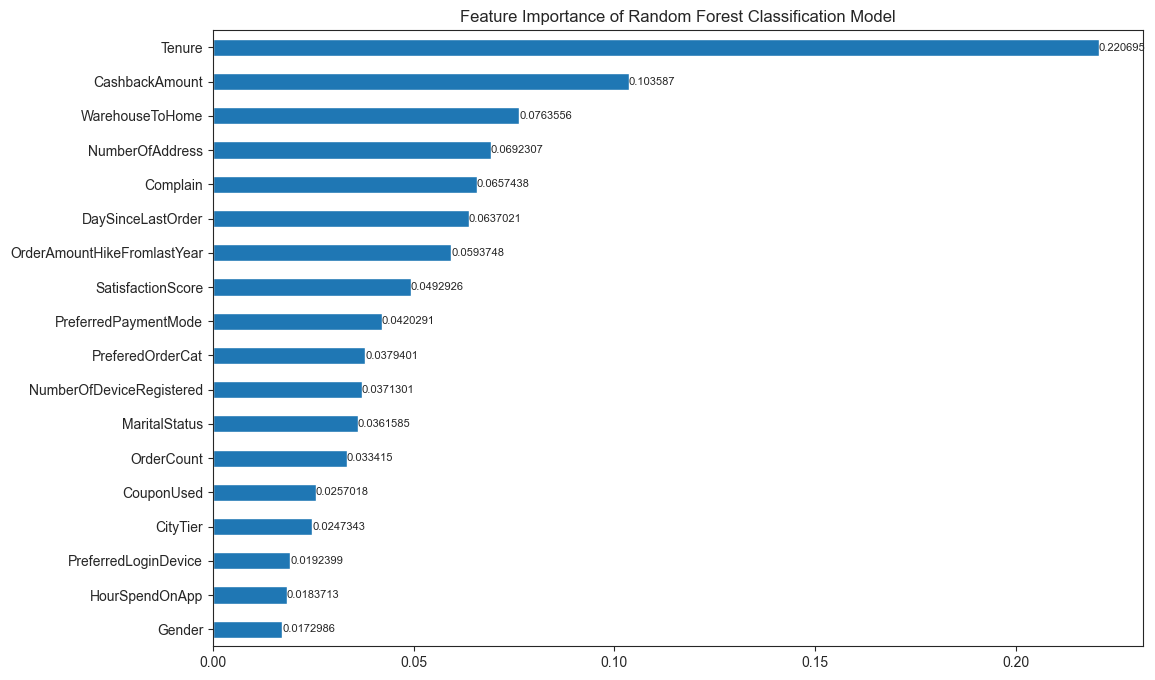

In [78]:
# feature scores

feature_scores = pd.Series(final_clf_model.feature_importances_, final_clf_model.feature_names_in_).sort_values(ascending = True)

plt.figure(figsize = (12, 8))
ax = feature_scores.plot(kind = 'barh')
ax.bar_label(ax.containers[0], size = 8)
plt.title("Feature Importance of Random Forest Classification Model");

From the F-Score plots its obvious that, 

- __Tenure__ and __CashbackAmount__ are the two most important features regarding the prediction of Churn.  
- __WarehouseToHome__ & __NumberOfAddress__ are the next two important features regarding the prediction of Churn.  

<a id = "applying-final-model"></a>

# __Applying the final model (Random Forest Classification Model) on test data__
Lets apply Random Forest Classification Model on our untouched test data in order to perform a realistic check of the models' performance.

In [79]:
y_actual = np.array(y_test)

# Predicting test data 
y_predicted = final_clf_model.predict(X_test)

<a id = "Results"></a>

# __Results__

### Classification Report 

In [80]:
# Classification Report 

print(classification_report(y_actual, y_predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       699
           1       0.96      0.91      0.94       146

    accuracy                           0.98       845
   macro avg       0.97      0.95      0.96       845
weighted avg       0.98      0.98      0.98       845



__Interpretations:__

- __accuracy:__ Among all the target data, 98% were predicted correctly. 
- __precision__ : Among the customers who are predicted as Churn, 96% are correctly predicted & Among the customers who are predicted as Not Churn, 98% are correctly predicted.
- __recall__ : Among the customers who are actually Churn, 91% were predicted correctly & Among the customers who are actually Not Churn, 99% were predicted correctly.
- __f1-score__ : Among the Churn customers, f1-score is 94% & among the Not Churn customers, f1-score is 99%. 
- __support:__ Among the 845 actual data, 699 was 'Not Churn' & 146 were 'Churn'. 

### Confusion Matrix 
The confusion_matrix function evaluates classification accuracy by computing the confusion matrix with each row corresponding to the true class

In [81]:
# Confusion Matrix 

print(confusion_matrix(y_actual, y_predicted))

[[694   5]
 [ 13 133]]


__Interpretations:__
- No. of target values which are actually 'Churn' & also predicted as 'Churn' = 694 (True Positive)
- No. of target values which are actually 'Churn' but predicted as 'Not Churn' = 13 (False Negative)
- No. of target values which are actually 'Not Churn' & also predicted as 'Not Churn' = 133 (True Negative)
- No. of target values which are actually 'Not Churn' but predicted as 'Churn' = 5 (False Positive)

### ROC & AUC

To assess how well a classification model fits into a dataset, we can look at the following two metrics:

__Sensitivity:__ The probability that the model predicts a positive outcome for an observation when indeed the outcome is positive. This is also called the “true positive rate.”


__Specificity:__ The probability that the model predicts a negative outcome for an observation when indeed the outcome is negative. This is also called the “true negative rate.”


One way to visualize these two metrics is by creating a ROC (Receiver Operating Characteristic) curve. This is a plot that displays the sensitivity and specificity of a classification model.

AUC : 0.9921316165951359


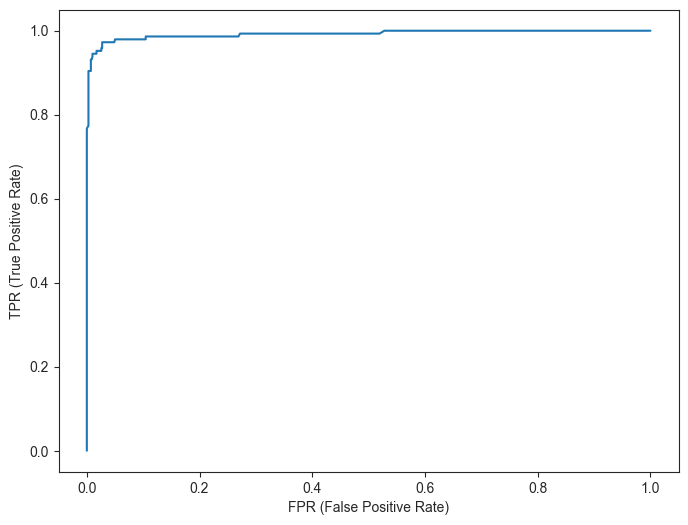

In [82]:
import sklearn.metrics as metrics

y_pred_proba = final_clf_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

# Plotting ROC Curve 
plt.figure(figsize = (8, 6))
plt.plot(fpr,tpr)
plt.ylabel('TPR (True Positive Rate)')
plt.xlabel('FPR (False Positive Rate)')

# Printing AUC
print('AUC :', np.trapz(tpr,fpr))

The more that the curve hugs the top left corner of the plot, the better the model does at classifying the data into categories. To quantify this, we can calculate the AUC (Area Under the Curve) which tells us how much of the plot is located under the curve. The closer AUC is to 1, the better is the model. 

From the above ROC plot & AUC value (0.99) it's obvious that- __our model is great at classifying the churn rate of customers__. 

# __Saving the final trained model__

In [83]:
model = final_clf_model
filename = 'customer_churn_clf_model.sav'

# Saving the Model with Joblib 
joblib.dump(model, filename)

['customer_churn_clf_model.sav']

## __Loading and Testing the saved Model__

In [84]:
# Load the saved model 
churn_pred_model = joblib.load('customer_churn_clf_model.sav')

# Testing Loaded Model 
churn_pred_model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

<a id = "findings-of-the-project"></a>

# __Key Findings of the Project__

1. Mobile phone is more preferred login device than computer. 
1. Among the 5 types of Payment Methods, Debit Card is the most preferred. 
1. Among the 5 types of Order Categories, Mobile Phone is the dominant order category. 
1. 50% of the customers registerd in 4 or less devices.
1. 75% of the customers spend 3 or less hours on App.
1. 75% of the customers used less than or equal to 2 No. of coupons.
1. 65% of the customers are from City Tier 1. 
1. 71% of the customers provide complain.
1. Satisfaction Score increases when HoursSpendOnApp is less than 1 & greater than 2.
1. Mean Satisfaction Score = 3 (On a scale of 1 to 5). 
1. Mean Order Count = 3 ; 50% of the customers order less than or equal to 2 No. of times. 
1. Most of the customers are Male & married.
1. Mean order count of females are slightly more than men. 
1. Divorced customers are slightly more satisfied than married and single customers.
1. Avg. order count from City Tier 3 is maximum.
1. _OrderCount_ & _CouponUsed_ is positively correlated with a coefficient of 0.65. 
1. There is no significant correlation between _Churn_ & _Complain_ (0.25).
1. Among the 9 ML models, Random Forest Classifier was the best in performance.
1. The most important features regarding the prediction of Churn are __Tenure__, __CashbackAmount__ & __WarehouseToHome__, __NumberOfAddress__ & __Complain__.
1. Our model is pretty great at Churn prediction with accuracy = 98%, precision = 96%, recall = 91%, f1-score = 94% & AUC = 0.99